# **Principle Component Analysis**

I am working on three datasets:
* The first Covid-19 dataset reports the number of total cases for different countries at the end of each day. We will use this dataset in **Parts 1 to 3**.
* The second Covid-19 dataset reports the total number of death for each country at the end of each day. We use this dataset in **Part 4 and 5**. 
* Finally, we will apply PCA to images using the Fashion-MNIST dataset of fashion clothes in **Part 6**.

In [1]:
import pandas as pd
cases_raw = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/aps1070-2019/datasets/master/confirmed-june21.csv',
    index_col=0,
    thousands=','
)

## ** Understanding trends before and after Standardization **

In [2]:
#pd.set_option('display.max_rows', 10)
#pd.set_option('display.max_columns', 55)
cases_raw

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,...,2021-05-07,2021-05-08,2021-05-09,2021-05-10,2021-05-11,2021-05-12,2021-05-13,2021-05-14,2021-05-15,2021-05-16,2021-05-17,2021-05-18,2021-05-19,2021-05-20,2021-05-21,2021-05-22,2021-05-23,2021-05-24,2021-05-25,2021-05-26,2021-05-27,2021-05-28,2021-05-29,2021-05-30,2021-05-31,2021-06-01,2021-06-02,2021-06-03,2021-06-04,2021-06-05,2021-06-06,2021-06-07,2021-06-08,2021-06-09,2021-06-10,2021-06-11,2021-06-12,2021-06-13,2021-06-14,2021-06-15
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,61455,61755,61842,62063,62403,62718,63045,63355,63412,63484,63598,63819,64122,64575,65080,65486,65728,66275,66903,67743,68366,69130,70111,70761,71838,72977,74026,75119,76628,77963,79224,80841,82326,84050,85892,87716,88740,89861,91458,93272
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,131577,131666,131723,131753,131803,131845,131890,131939,131978,132015,132032,132071,132095,132118,132153,132176,132209,132215,132229,132244,132264,132285,132297,132309,132315,132337,132351,132360,132372,132374,132379,132384,132397,132415,132426,132437,132449,132459,132461,132469
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,123692,123900,124104,124288,124483,124682,124889,125059,125194,125311,125485,125693,125896,126156,126434,126651,126860,127107,127361,127646,127926,128198,128456,128725,128913,129218,129640,129976,130361,130681,130958,131283,131647,132034,132355,132727,133070,133388,133742,134115
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13390,13406,13423,13429,13447,13470,13470,13510,13510,13510,13555,13569,13569,13569,13569,13569,13569,13569,13664,13671,13682,13693,13693,13693,13727,13729,13744,13752,13758,13758,13758,13777,13781,13791,13805,13813,13813,13813,13826,13828
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,28201,28477,28740,28875,29146,29405,29695,30030,30354,30637,30787,31045,31438,31661,31909,32149,32441,32623,32933,33338,33607,33944,34180,34366,34551,34752,34960,35140,35307,35594,35772,35854,36004,36115,36325,36455,36600,36705,36790,36921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,3137,3245,3412,3489,3571,3658,3740,3816,4112,4212,4359,4512,4720,4809,4941,5119,5275,5404,5931,6086,6356,6396,6908,7107,7432,7625,7870,8063,8364,8580,8791,9027,9222,9635,9835,10048,10337,10630,10881,11304
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,300946,301437,301751,302249,302777,303270,303270,303270,303658,303827,304074,304074,304532,304532,304968,305201,305201,305777,306334,306795,306795,307569,307838,308048,308350,308732,309036,309333,309644,309853,310026,310026,310544,310544,311018,311018,311018,311534,311690,311948
Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6446,6462,6482,6485,6492,6498,6507,6523,6538,6543,6568,6586,6593,6613,6632,6649,6658,6662,6670,6688,6696,6723,6731,6737,6742,6751,6759,6767,6773,6780,6787,6812,

In [3]:
from datetime import datetime
x = cases_raw.columns.values.copy()
date_time_x = []
for i in x: 
  date_time_x.append(datetime.strptime(i, '%Y-%m-%d'))

In [4]:
#function to plot the time series for different countries
import matplotlib.pyplot as plt
import numpy as np
def time_plot(dataframe, countries, col = 2):
  plt.figure(figsize=(20, len(countries)*4))
  for count, i in enumerate(countries):
    plt.subplot(round(len(countries)/2), col , count+1)
    plt.title(i)
    plt.xlabel("Day")
    plt.ylabel("Number of cases")
    plt.xticks(rotation = 45)
    plt.plot(date_time_x, dataframe.loc[i, :])

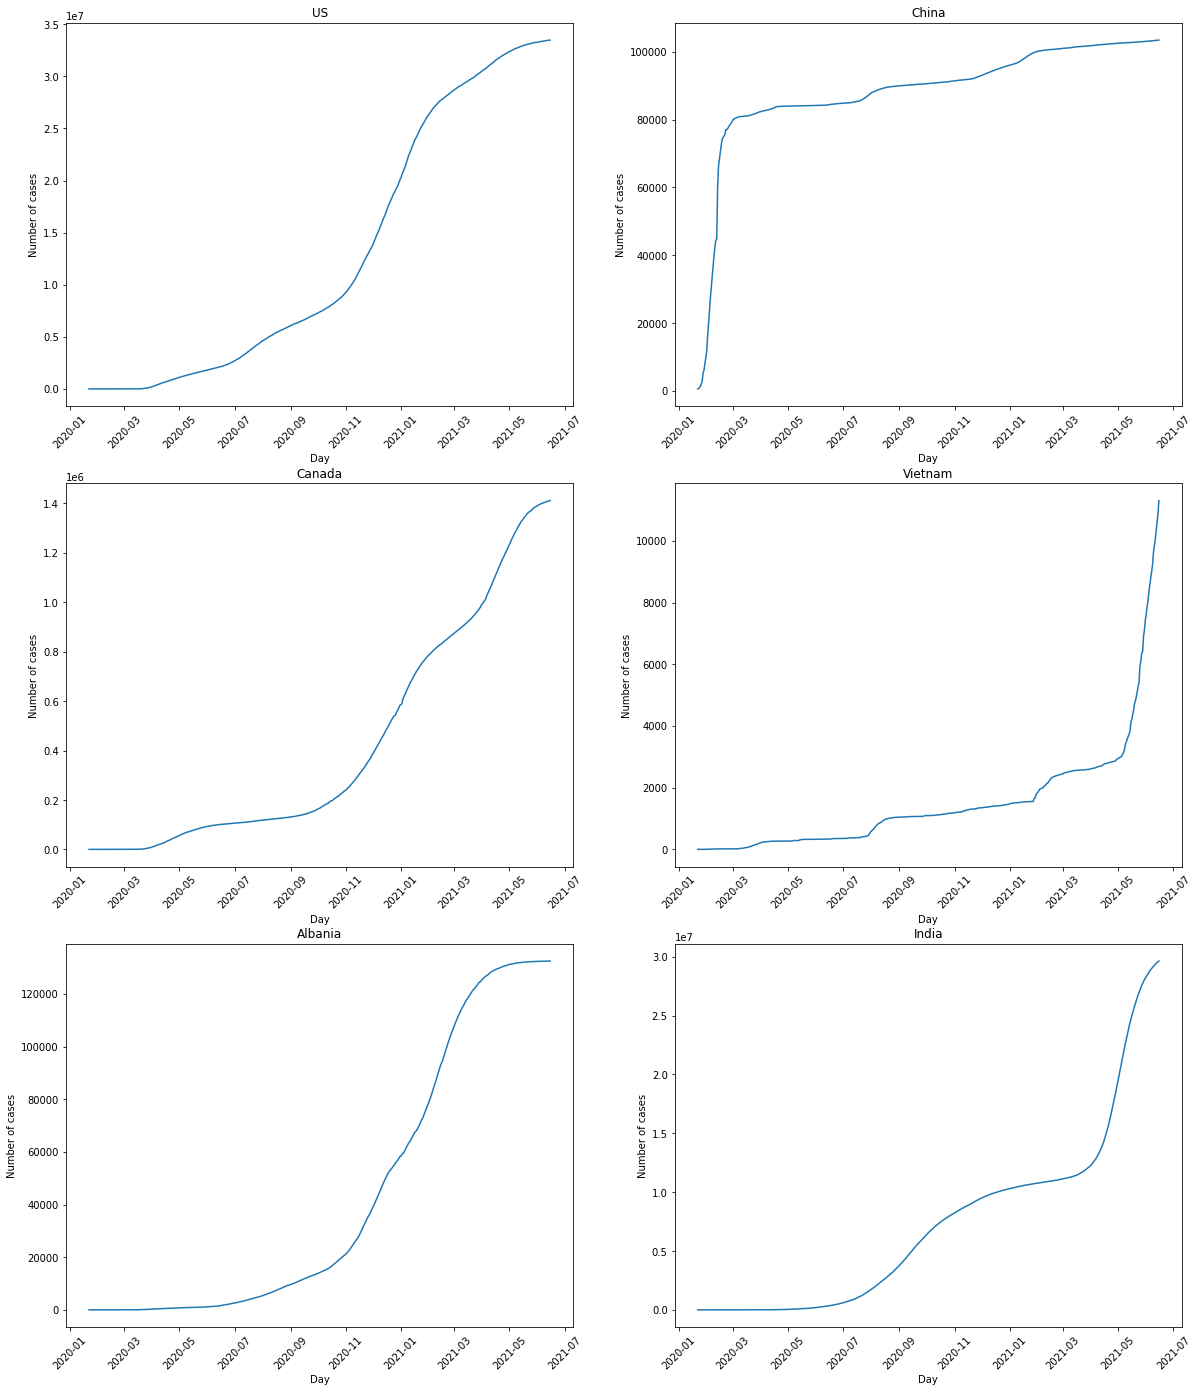

In [ ]:
time_plot(cases_raw, ['US','China', 'Canada', 'Vietnam', 'Albania', 'India'])


In [5]:
#standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
copy_df = cases_raw.copy()
stan_array = sc.fit_transform(copy_df)

stan_df = pd.DataFrame(stan_array, columns= cases_raw.columns)
stan_df['Country'] = cases_raw.index
stan_df = stan_df.set_index('Country')

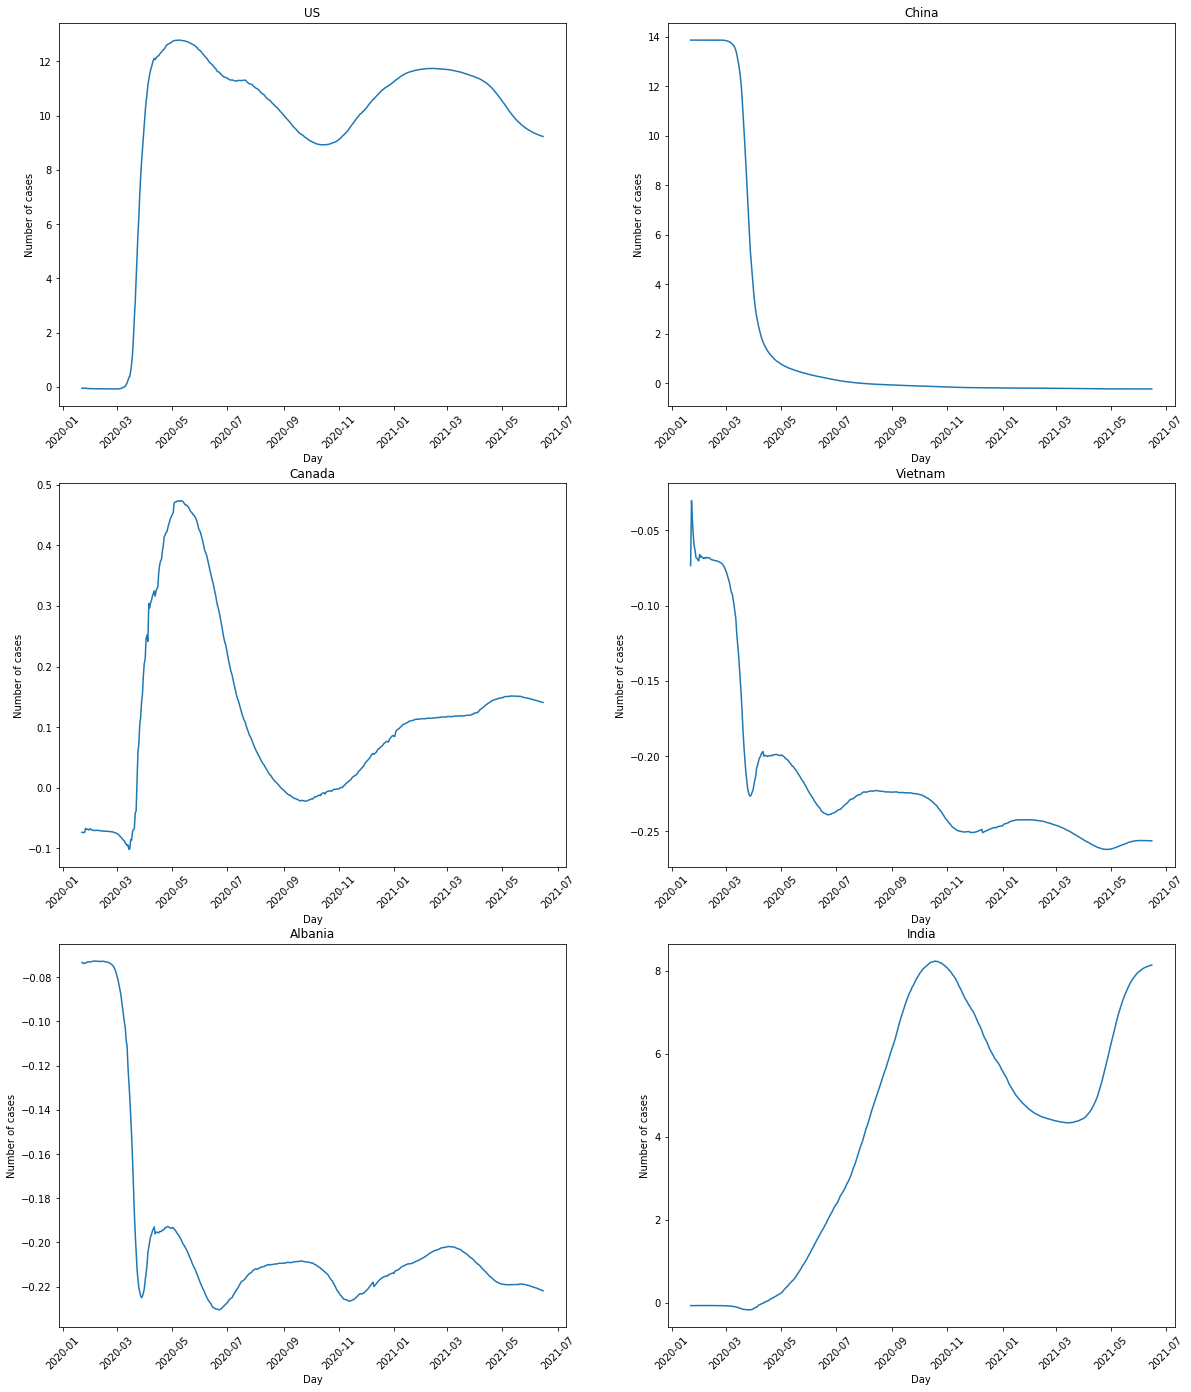

In [6]:
time_plot(stan_df, ['US','China', 'Canada', 'Vietnam', 'Albania', 'India'])

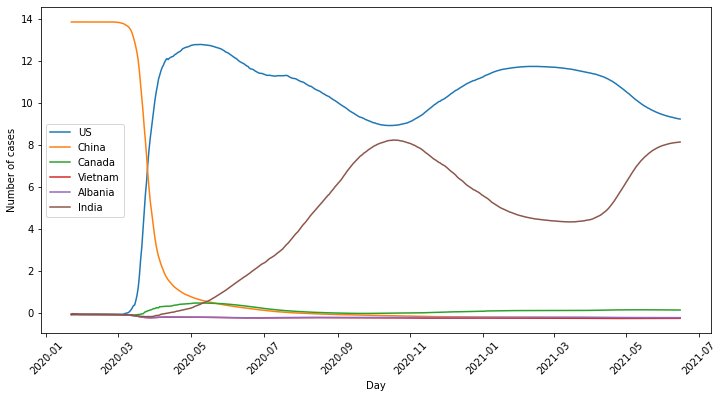

In [7]:
#plotting all the plots on the same axis to understand how different was the number of cases for different countries
fig, ax = plt.subplots(figsize=(12, 6))
plt.xlabel("Day")
plt.ylabel("Number of cases")
plt.xticks(rotation = 45)
for count, i in enumerate(['US','China', 'Canada', 'Vietnam', 'Albania', 'India']):
  ax.plot(date_time_x, stan_df.loc[i, :], label = i) 
plt.legend()

In [8]:
#the code snippet below was used to understand the proportion of cases for a country compared to all the countries on a particular day
cntry_list = ['US','China', 'Canada']
month_list = [*range(1,13,1)]

data_list = []

for mon in month_list:
    temp_dict = {}
    for cntry in cntry_list:
        raw_date = f'2020-{mon if len(str(mon))>1 else "0"+str(mon)}-24'
        temp_dict['date'] = raw_date
        temp_dict[f'{cntry}_contribution'] =  cases_raw.loc[cntry, raw_date]/cases_raw.loc[:, raw_date].sum()
        temp_dict[f'{cntry}_standardized'] = stan_df.loc[cntry, raw_date]
    data_list.append(temp_dict)

1. These four aspects of the standardized graphs, can help us understand the trends of the countries:

  1.1. As we have standardized each column such that the mean is 0, on any day, if the **value on the on the y axis of the standardized curve is below 0**, it indicats that the **cases** on that day for the country which we are plotting is **below the average** of the cases for all the countries on that day.

  1.2. Similarly, if the values for a day on the y axis of the standardized curve is **above 0**, it indicateds that the **cases for that country is more than the average** of all the cases for all the countries on that day. 

  1.3. The **higher the curve** goes (when it is **above 0**) / the **lower** the curve goes(when it is **below 0**), the **more/less is its contribution to the total number of cases** on that day, **compared to the previous days**, respectively.

  1.4. Similarly, the **lower** the curve goes (when it is **above 0**) / the **higher** the curve goes(when it is **below 0**), the **less/more is its contribution to the total number of cases** on that day, respectively. For the **latter**, the **number of cases would still be lower than the mean of cases**, as long as **it's standardized value is below 0**, even when its contribution to the total cases on that day increases compared to the previous days. 

2. Trend for US:

  2.1. On the very first day -	2020-01-22, the number of cases in the US is 1, which is slightly below the mean number of cases - 2.58, for all the countries on that day. That is why in the standardized plot, the point for 2020-01-22 is slightly below 0. 

  2.2. By March, the number of cases peak, "2020-03-18", the number of cases in US is 9169, which contributes to 4% of cases on that day, as opposed to 0.01% during February. That explains why the curve goes really further away from 0.

  2.3. During the month of April, the contribution of US to the total cases is 31 % and in June it decreases to 25 %, which is why the stabdardized curve also reduces from April to June.

3. Trend for China

  3.1. The contrubution of China for the covid cases in the world was higher in the initial months- it was 98% in late January. 

  3.2.But, as the disease spread across the world and the cases started rising significantly in other countries, the China's proportion toward the total covid cases of all countries reduced.

4. Trend for Canada 

  4.1. In April proportion of cases in Canada compared to the world is 1.35 %, but in May the proportion increases to 1.6%, which is reflected in the standardized graph. 

  4.2. Then, by June the proportion starts to reduce (1.4%), and hence the curve goes down. It should also be noted that the range on x axis is -0.1 to 0.5, which is lesser than the ranges of US and China, which is around 0-12. 


Below is a table that indicates the contribution that these countries make to the total number of cases for one day in each month, and the corresponding standardized value. 

In [9]:
pd.DataFrame(data_list)

,date,US_contribution,US_standardized,China_contribution,China_standardized,Canada_contribution,Canada_standardized
0,2020-01-24,0.002125,-0.043540,0.977683,13.855907,0.000000,-0.073822
1,2020-02-24,0.000201,-0.071441,0.971023,13.854961,0.000126,-0.072523
2,2020-03-24,0.132537,5.637622,0.190536,8.205014,0.006515,0.059052
3,2020-04-24,0.326369,12.569114,0.029754,0.961605,0.015930,0.420632
4,2020-05-24,0.304794,12.616532,0.015511,0.434968,0.015882,0.450587
5,2020-06-24,0.253409,11.520554,0.008992,0.176874,0.011054,0.272564
6,2020-07-24,0.260603,11.204683,0.005457,0.012103,0.007288,0.092399
7,2020-08-24,0.242400,10.330360,0.003791,-0.060547,0.005391,0.009148
8,2020-09-24,0.216527,9.224220,0.002801,-0.103871,0.004681,-0.021843
9,2020-10-24,0.201334,8.982053,0.002133,-0.139569,0.005058,-0.005650


# Applying PCA 

I am computing eigen vectors, eigen values and identifying the best PCs by identifying the maximum variance the eigen values cover. 

In [10]:
#Computing Covarince matrix based on the features
obs, feat = stan_df.shape
Cov_df = np.dot(stan_df.T, stan_df) / (obs-1)
print("The covariance matrix, based on the features, is shown below \n" ,Cov_df)
print("\n The shape of the covariance matrix is", Cov_df.shape)

The covariance matrix, based on the features, is shown below 
 [[ 1.00520833  1.00520139  1.00519427 ... -0.015627   -0.01563874
  -0.01565278]
 [ 1.00520139  1.00520833  1.00520147 ... -0.01586662 -0.01587827
  -0.01589214]
 [ 1.00519427  1.00520147  1.00520833 ... -0.01527189 -0.01528431
  -0.01529908]
 ...
 [-0.015627   -0.01586662 -0.01527189 ...  1.00520833  1.00520776
   1.00520501]
 [-0.01563874 -0.01587827 -0.01528431 ...  1.00520776  1.00520833
   1.00520708]
 [-0.01565278 -0.01589214 -0.01529908 ...  1.00520501  1.00520708
   1.00520833]]

 The shape of the covariance matrix is (511, 511)


In [11]:
#getting sorted eigen values and vectors

def get_sorted_eigen(df, sample = False):
  #standardizing the dataframe inside the function
  copy_df = df.copy()
  stan_array = sc.fit_transform(copy_df)
  stan_df = pd.DataFrame(stan_array, columns= cases_raw.columns)
  stan_df['Country'] = cases_raw.index
  stan_df = stan_df.set_index('Country')

  #Calculating the covariance 
  if sample == False:
    obs, feat = stan_df.shape
    cov_df = np.dot(stan_df.T, stan_df) / (obs-1)
    #print("The shape of the covariance matrix is", cov_df.shape)
    eigenValues, eigenVectors = np.linalg.eigh(cov_df)
  else:
    obs, feat = stan_df.shape
    cov_df = np.dot(stan_df, stan_df.T) / (feat-1) #the denominator needs to be altered because the covariance is calculated for the samples/observations
    #print("The shape of the covariance matrix is", cov_df.shape)
    eigenValues, eigenVectors = np.linalg.eigh(cov_df)

  #sorting the eigen values and eigen vectors based on eigen values based on tutorial
  indices_sorted = (-eigenValues).argsort()
  eigenValues = eigenValues[indices_sorted]
  eigenVectors = eigenVectors[:, indices_sorted]    
  return eigenValues, eigenVectors


In [12]:
#just checking how it works in case we are calculating the covariance of the samples, we can see that the shape of covariance matrix is [193,193], whereas, for the features it is [511,511]
eigenValues1, eigenVectors1 = get_sorted_eigen(cases_raw, sample= True)
print("The shape of eigen values is", eigenValues1.shape)
print("The shape of eigen vectors is",eigenVectors1.shape)

The shape of eigen values is (193,)
The shape of eigen vectors is (193, 193)


In [13]:
#getting sorted eigen values and vectors for the dataframe 

eigenValues, eigenVectors = get_sorted_eigen(cases_raw)
print("The shape of eigen values is", eigenValues.shape)
print("The shape of eigen vectors is", eigenVectors.shape)


The shape of eigen values is (511,)
The shape of eigen vectors is (511, 511)


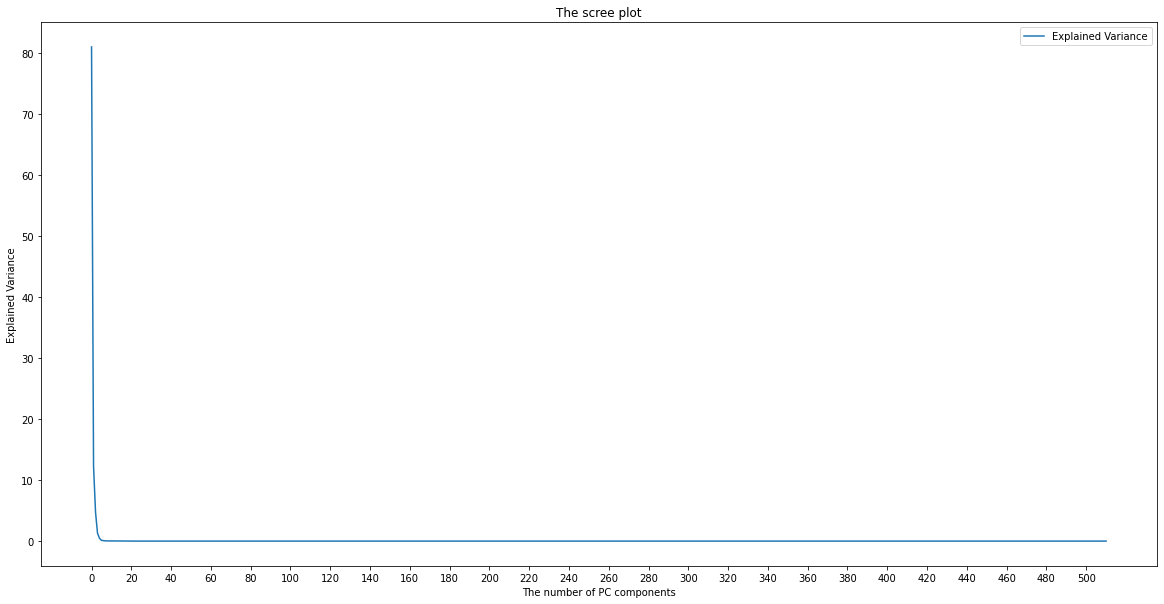

In [14]:
#plotting scree plot

eigValSum = sum(eigenValues)
expVar = [eigV/eigValSum*100 for eigV in eigenValues] #taken from tutorial

plt.figure(figsize=(20, 10))
plt.plot(range(len(eigenValues.T)), expVar, label='Explained Variance')
plt.title("The scree plot")
plt.xlabel("The number of PC components")
plt.ylabel("Explained Variance")

plt.xticks(np.arange(0,520,20))
plt.legend()
plt.show()

Text(0, 0.5, 'Cumulative Variance')

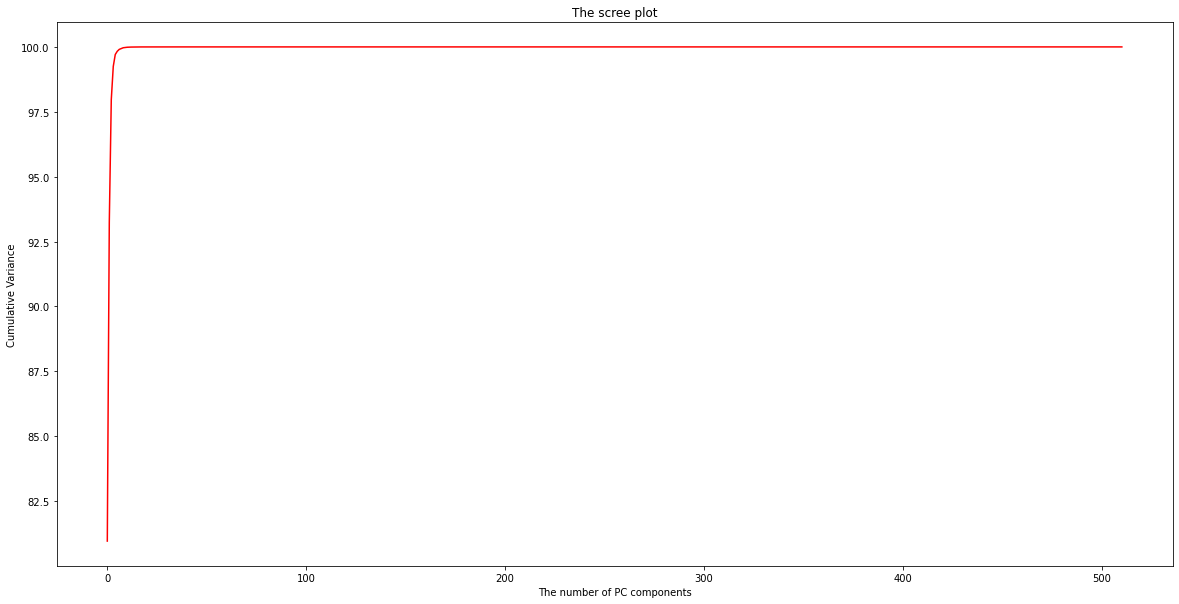

In [15]:
#Plotting cumulative variance versus number of PC components
plt.figure(figsize=(20, 10))
cumExpVar = np.cumsum(expVar)
plt.plot(cumExpVar, color='red', label='Cumulative Explained Variance')
plt.title("The scree plot")
plt.xlabel("The number of PC components")
plt.ylabel("Cumulative Variance")


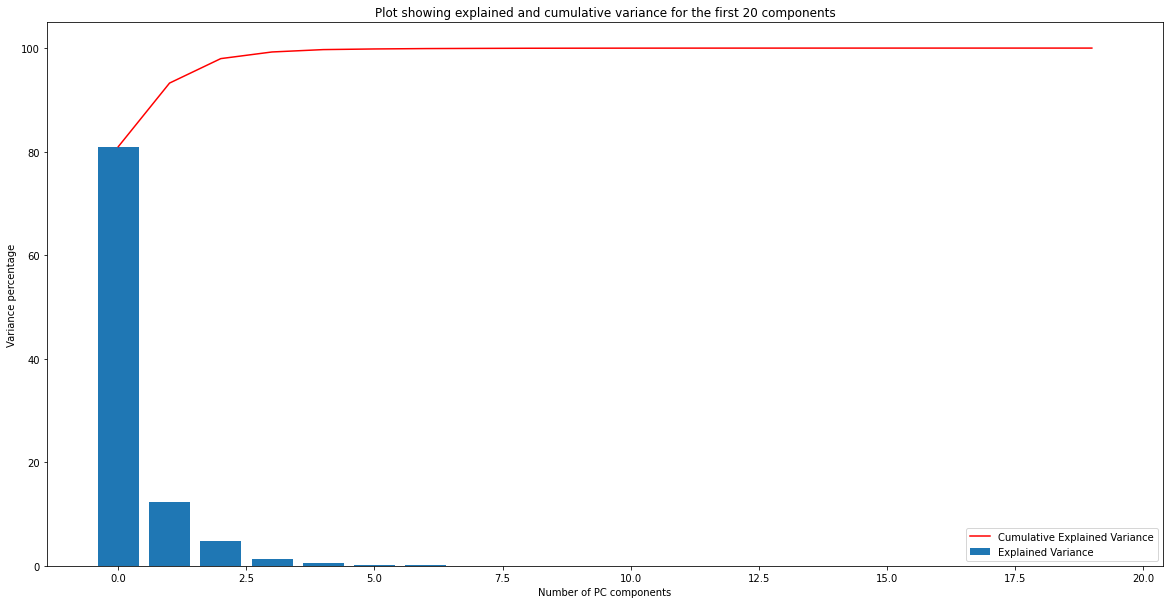

In [16]:
#another plot to show explained variance and cumulative variance for the first 20 PC components 
cumExpVar = np.cumsum(expVar)
plt.figure(figsize=(20, 10))
plt.bar(range(20), np.array(expVar)[0:20], label='Explained Variance')
#plt.yticks(np.arange(-10,110,20))
#plt.xticks(np.arange(0,,10))
plt.plot(cumExpVar[0:20], color='red', label='Cumulative Explained Variance')
plt.title("Plot showing explained and cumulative variance for the first 20 components")
plt.xlabel("Number of PC components")
plt.ylabel("Variance percentage")
plt.legend()
plt.show()

In [17]:
#getting the total number of PC components that explain 99% variance
def no_PC_components(eigenvalues, threshold = 0.99):
  total_eigval = sum(eigenvalues)
  expVar = [eigv/total_eigval for eigv in eigenvalues]
  cumExpVar = np.cumsum(expVar)
  for count, i in enumerate(cumExpVar):
    if(i>=threshold):
      print(f"You need the first {count +1} number of PC components to explain {threshold*100} of the variance")
      break


In [18]:
#Calling the function to get the number of PCs
no_PC_components(eigenValues)

You need the first 4 number of PC components to explain 99.0 of the variance


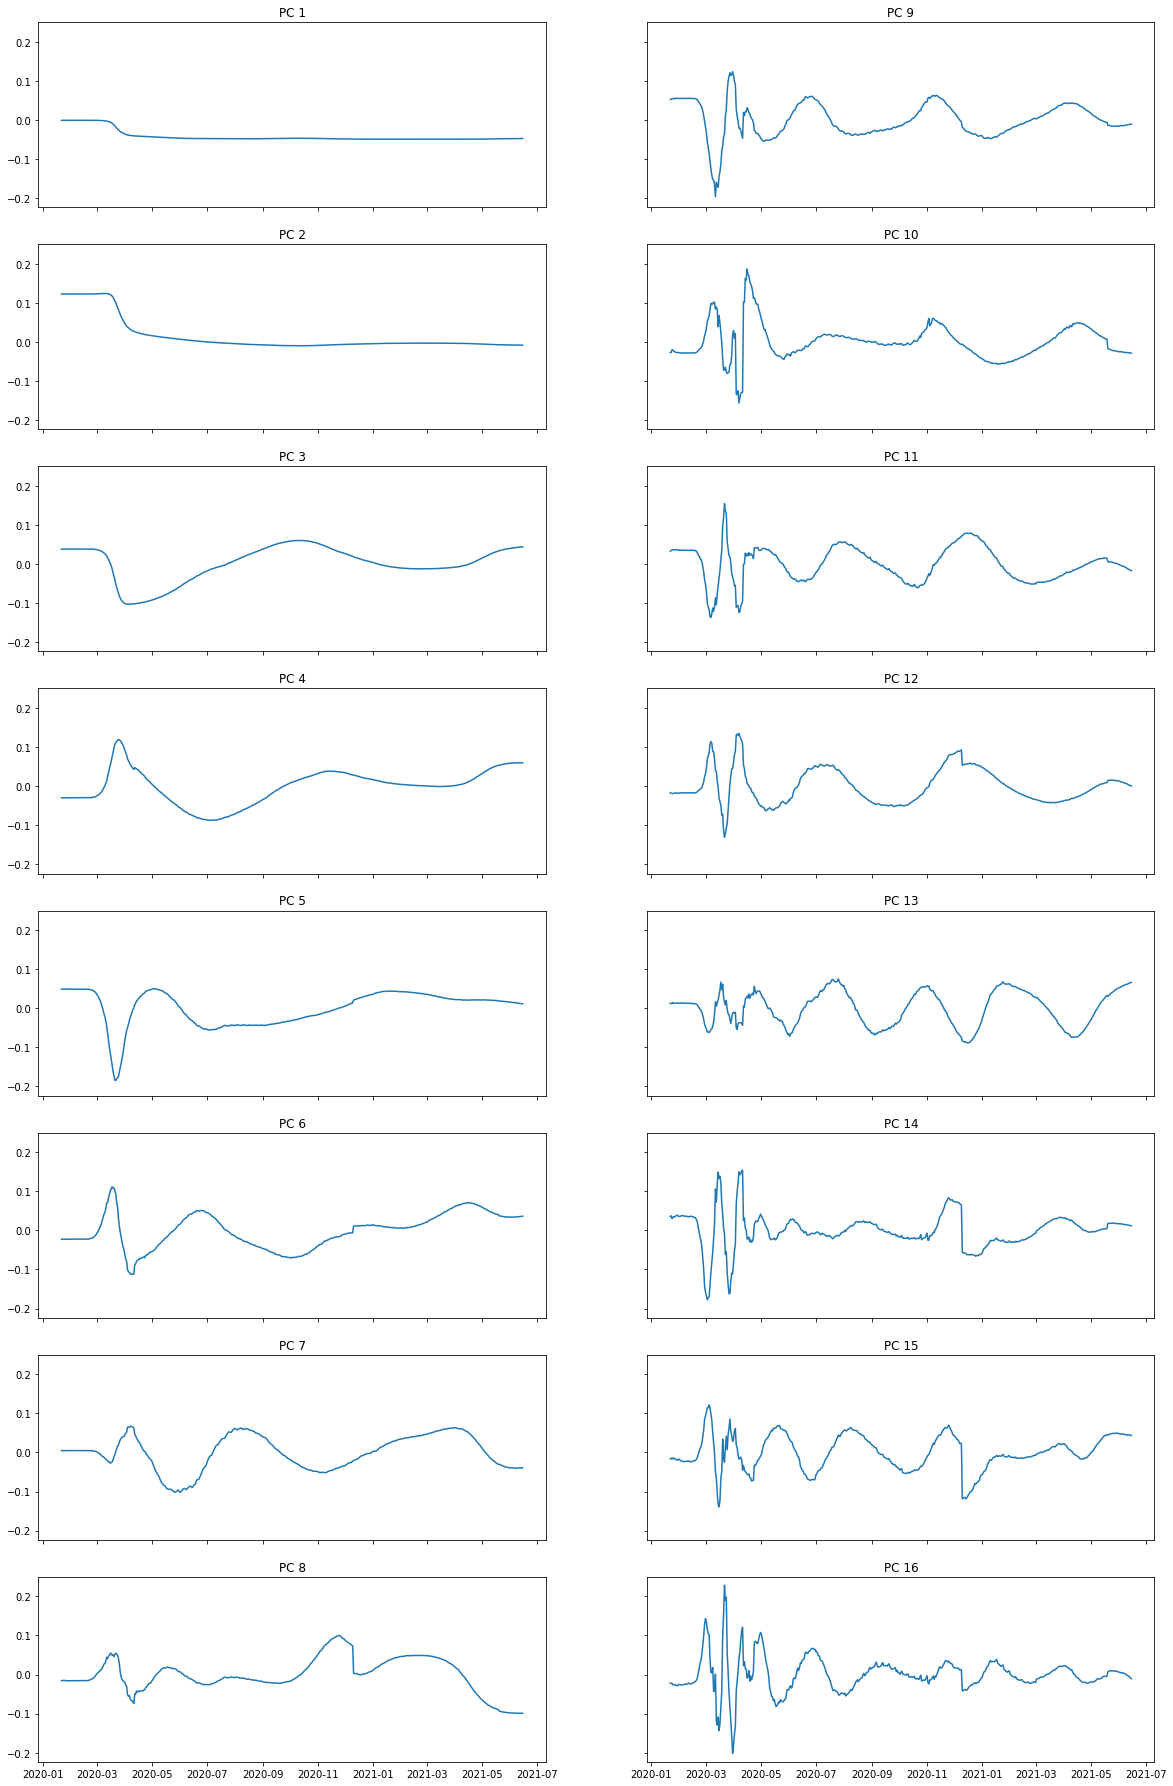

In [19]:
subplot_eigenvec = eigenVectors[:, 0:16]
#plt.figure(figsize=(20, subplot_eigenvec.shape[1]*50))
count = 0
fig, ax = plt.subplots(round(subplot_eigenvec.shape[1]/2), 2, sharex= True, sharey= True, figsize=(20, subplot_eigenvec.shape[1]*2))
while count < round(len(subplot_eigenvec.T)/2):
    #print(count, round(len(subplot_eigenvec.T)/2))
    ax[count, 0].plot(date_time_x, subplot_eigenvec[:,count])
    ax[count,0].set_title(f"PC {count+1}")
    count = count+1
while (count >= 8 and count < 16):
    #print(count, round(len(subplot_eigenvec.T)/2), len(subplot_eigenvec.T))
    ax[count-8, 1].plot(date_time_x, subplot_eigenvec[:,count])
    ax[count-8,1].set_title(f"PC {count+1}")
    count = count+1




1.   We can see that the first few PCs are more smoother. 
2.   All the eigen vectors in the very first PC is close to 0. 
3.   As the PC number increases, the eigen vectors become more scattered and away from 0. 
4. From PC 4/5, the curve starts getting more rougher and rougher with a lot of fluctuatios.
5. The first principal component takes the most relevant features that are able to capture majority of our data points (maximum eigen value) and creates a principal component that best fits the majority of the data points. 
6. The second principal component is trying to fit the data points, with the lesser important or noisy features (that were not included in the first PC) that are not able to fully capture the variations and diversity of the data points. Hence, the curve is less smooth and straight. 
7. The higher PCs have a lot of fluctuations and that can be tried to explain with the logic of underfitting. Basically, principal component is trying to fit the best line by reading and fully analyzing all the noisy, redudant features that are left. But even after capturing all those noise, it is not able to fit most of the data points, which is why its eigen value is very less. These PCs will also generate high reconstruction error.  



# Data reconstruction

WHat does the function do:

*   Accepts a country name and the original dataset as inputs.
*   Calls useful functions that you designed in previous parts to compute eigen vectors and eigen values. 
*   Plots 5 figures:
  1.   The original time-series for the specified country. 
  2.   The standardized time-series for the specified country. 
  3.   The incremental reconstruction of the **original** (not standardized) time-series for the specified country in a single plot. 
    * You should at least show 5 curves in a figure for incremental reconstruction. For example, you can pick the following (or any other combination that you think is reasonable): 
        * Reconstruction with only PC1
        * Reconstruction with both PC1 and PC2
        * Reconstruction with PC1 to PC4 (First 4 PCs)
        * Reconstruction with PC1 to PC8 (First 8 PCs)
        * Reconstruction with PC1 to PC16 (First 16 PCs)
  4.   The residual error for each of the 5 incremental reconstructions with respect to the original time-series.
    * Hint: You are plotting how much error do we have for reconstructing each day. On the x-axis, you have dates, and on the y-axis, the residual error. 
  5.   The RMSE of the reconstruction as a function of the number of included components (x-axis is the number of components and y-axis is the RMSE). 

I am testing the function by using the `US`, `Canada`, and `China` as inputs. 


In [20]:
from sklearn.metrics import mean_squared_error
import math

In [21]:
#this function takes eigenvectors and calculates the projection, reconstruction and inverse reconstruction and returns the inverse reconstructed dataframe.
#the function can return inverse reconstructed dataframe for 1 PC component or multiple PCs, and for both features and samples. 

def proj_recon(eigenVectors, stan_df, PC_component_index, sample = False):
  shape_list = []
  if((PC_component_index) == 1):

    if sample == False:

      projection =  np.dot(stan_df, eigenVectors[:,0:PC_component_index].reshape(-1,1))     
      reconstruction = np.dot(projection, eigenVectors[:,0:PC_component_index].reshape(-1,1).T)

      ##performing inverse
      inv_recon = sc.inverse_transform(reconstruction)

      invo_recon_df = pd.DataFrame(inv_recon, columns= stan_df.columns)
      invo_recon_df['Country'] = stan_df.index
      invo_recon_df = invo_recon_df.set_index('Country')

    else:

      projection =  np.dot(stan_df.T, eigenVectors[:,0:PC_component_index].reshape(-1,1))
      reconstruction = np.dot(projection, eigenVectors[:,0:PC_component_index].reshape(-1,1).T)

      ##performing inverse
      inv_recon = sc.inverse_transform(reconstruction.T)
      invo_recon_df = pd.DataFrame(inv_recon, columns= stan_df.columns)
      invo_recon_df['Country'] = stan_df.index
      invo_recon_df = invo_recon_df.set_index('Country')

  else:

    if sample == False:

      projection =  np.dot(stan_df, eigenVectors[:,0:PC_component_index])
      reconstruction = np.dot(projection, eigenVectors[:,0:PC_component_index].T)

      ##performing inverse
      inv_recon = sc.inverse_transform(reconstruction)
      invo_recon_df = pd.DataFrame(inv_recon, columns= stan_df.columns)
      invo_recon_df['Country'] = stan_df.index
      invo_recon_df = invo_recon_df.set_index('Country')  

    else:
      projection =  np.dot(stan_df.T, eigenVectors[:,0:PC_component_index])
      reconstruction = np.dot(projection, eigenVectors[:,0:PC_component_index].T)

      ##performing inverse
      inv_recon = sc.inverse_transform(reconstruction.T)
      invo_recon_df = pd.DataFrame(inv_recon, columns= stan_df.columns)
      invo_recon_df['Country'] = stan_df.index
      invo_recon_df = invo_recon_df.set_index('Country')  

  shape_list.append(eigenVectors.shape)
  shape_list.append(projection.shape)
  shape_list.append(reconstruction.shape)
  shape_list.append(inv_recon.shape)


  return invo_recon_df, shape_list

In [22]:
def plot_country_figures(original_df, country_name, sample = False):

  #plotting original series
  plt.figure(figsize=(12, 6))
  plt.plot(date_time_x, original_df.loc[country_name,:])
  plt.title('Original time series')
  plt.xlabel("Dates")
  plt.ylabel("Number of Cases")
  plt.show()

  #plotting standardized series 
  copy_original_df = original_df.copy()
  stan_array = sc.fit_transform(copy_original_df)
  stan_df = pd.DataFrame(stan_array, columns= original_df.columns)
  stan_df['Country'] = original_df.index
  stan_df = stan_df.set_index('Country')
  plt.figure(figsize=(12, 6))
  plt.plot(date_time_x, stan_df.loc[country_name,:])
  plt.title('Standardized time series')
  plt.xlabel("Dates")
  plt.ylabel("Standardized number of Cases")
  plt.show()

  RMSE_list = []
  shapes_list = []

  if sample == False:

    #plotting incremental reconstructions
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.set_title("Reconstructed Time Series")
    ax.set_ylabel("Number of cases")
    ax.set_xlabel("Dates")

    fig_error, ax_error = plt.subplots(figsize=(12, 6))
    ax_error.set_title("Residual error plots for 5 reconsructions")
    ax_error.set_ylabel("Residual error")
    ax_error.set_xlabel("Dates")

    list_reconstruction = [1,2,4,8,16]
    eigenValues, eigenVectors = get_sorted_eigen(original_df)

    for i in list_reconstruction:
        shape_list = []
        #reconstruction
        inv_reco1_df, shape_list = proj_recon(eigenVectors, stan_df, i)
        shapes_list.append(shape_list)
        ax.plot(date_time_x, inv_reco1_df.loc[country_name,:], label= f'Reconstructed time series with {i} PC components')  
        ax.legend()

        #residual plots 
        res_error1 = inv_reco1_df.loc[country_name,:] - original_df.loc[country_name,:] 
        ax_error.plot(date_time_x, res_error1 ,label= f'Residual error with {i} PC components') 
        ax_error.legend()

        #rmse calculation
        RMSE_list.append(math.sqrt(mean_squared_error(original_df.loc[country_name,:], inv_reco1_df.loc[country_name,:])))    
 
  
  else:

    #plotting incremental reconstructions
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.set_title("Reconstructed Time Series")
    ax.set_ylabel("Number of cases")
    ax.set_xlabel("Dates")

    fig_error, ax_error = plt.subplots(figsize=(12, 6))
    ax_error.set_title("Residual error plots for 5 reconsructions")
    ax_error.set_ylabel("Residual error")
    ax_error.set_xlabel("Dates")

    list_reconstruction = [1,2,4,8,16]
    eigenValues, eigenVectors = get_sorted_eigen(original_df, sample= True)

    for i in list_reconstruction:
        #reconstruction
        shape_list = []     
        inv_reco1_df, shape_list= proj_recon(eigenVectors, stan_df, i, sample = True)
        shapes_list.append(shape_list)
        ax.plot(date_time_x, inv_reco1_df.loc[country_name,:], label= f'Reconstructed time series with {i} PC components')  
        ax.legend()
        
        #residual plots 
        res_error1 = inv_reco1_df.loc[country_name,:] - original_df.loc[country_name,:] 
        ax_error.plot(date_time_x, res_error1 , label= f'Residual error with {i} PC components') 
        ax_error.legend()
        
        #rmse calculation
        RMSE_list.append(math.sqrt(mean_squared_error(original_df.loc[country_name,:], inv_reco1_df.loc[country_name,:]))) 

  
  plt.figure(figsize=(12, 6))
  plt.plot(np.arange(1,6,1), RMSE_list)
  plt.title("RMSE plot")
  plt.xlabel("Number of PCs")
  plt.ylabel("RMSE value")
  ticks = [1,2,3,4,5]
  labels = ['PC1', 'PC1 and PC2', 'First four PCs', 'First eight PCs', 'First sixteen PCs']
  plt.xticks(ticks, labels, rotation = 45)
  plt.show()

  return shapes_list
 
  

  

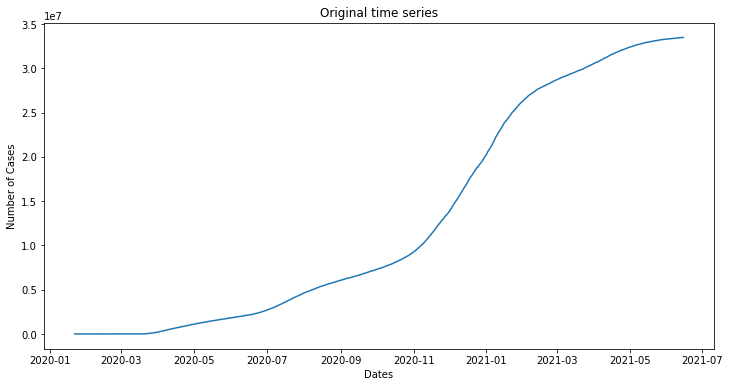

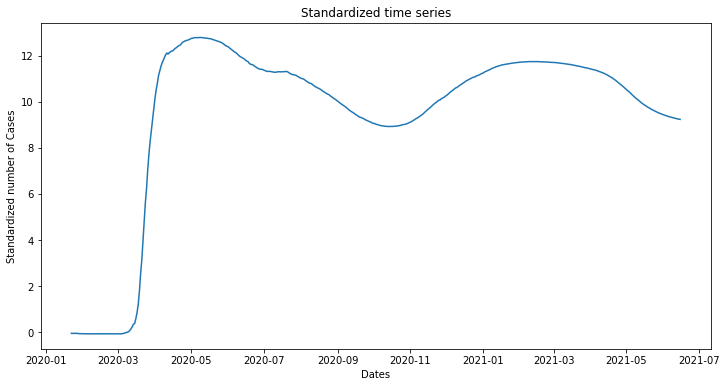

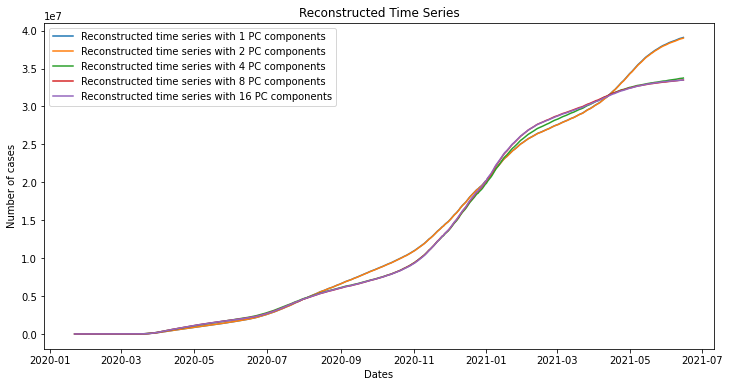

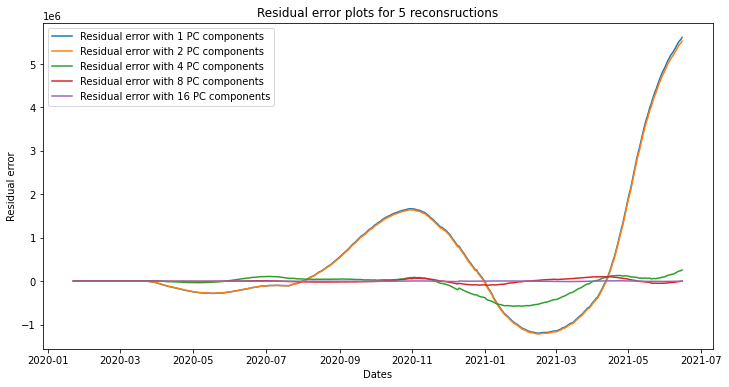

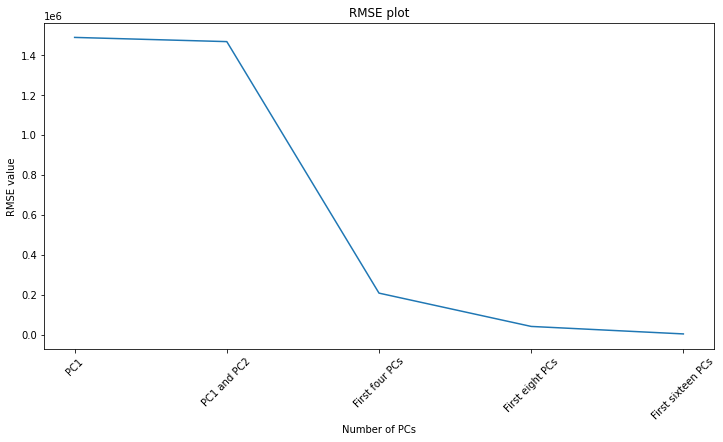

In [23]:
shape_US_cases_raw = plot_country_figures(cases_raw, 'US')

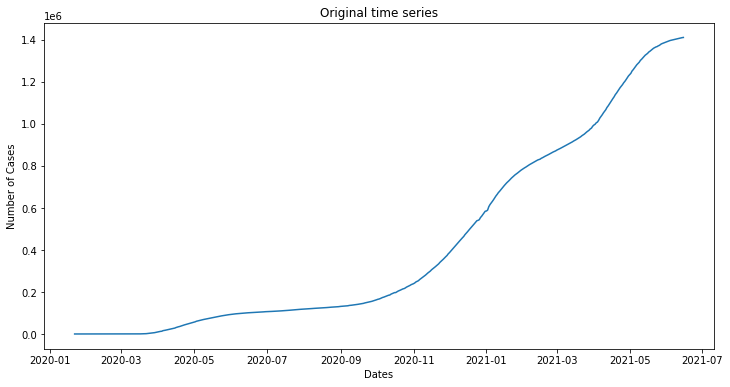

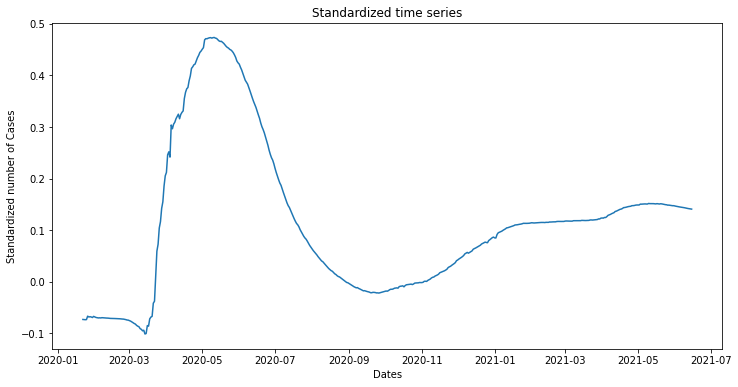

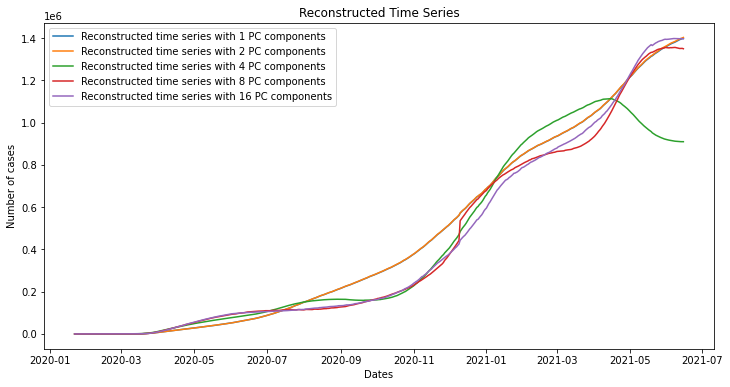

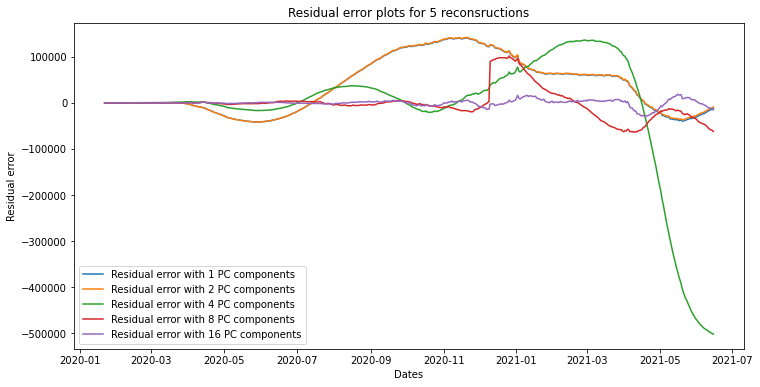

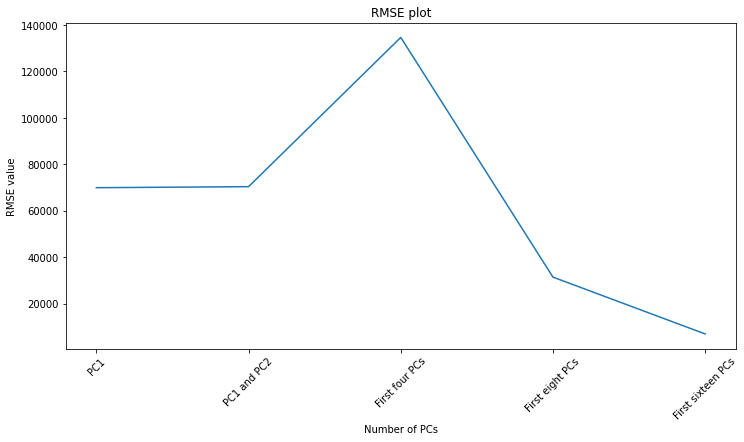

In [24]:
shape_Can_cases_raw = plot_country_figures(cases_raw, 'Canada')

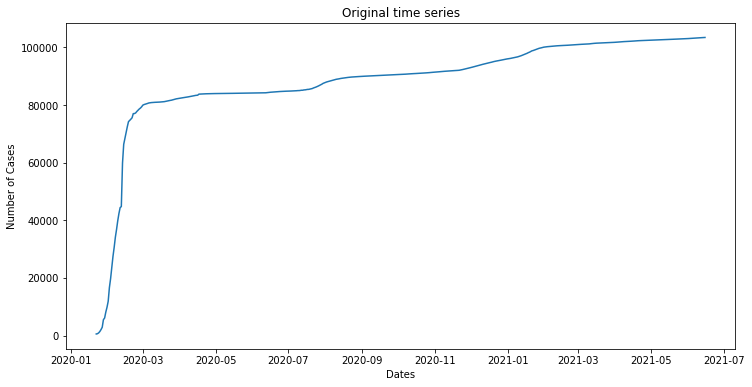

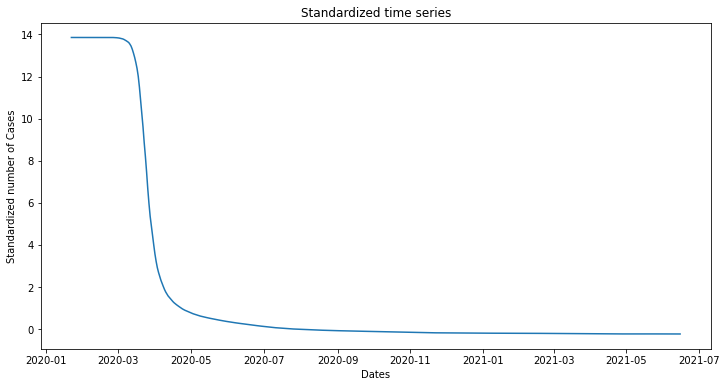

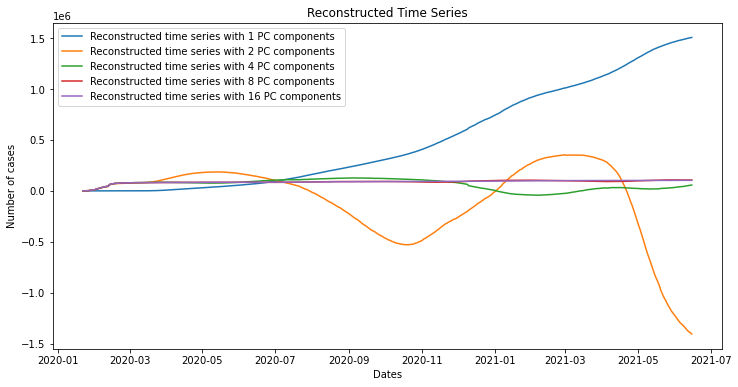

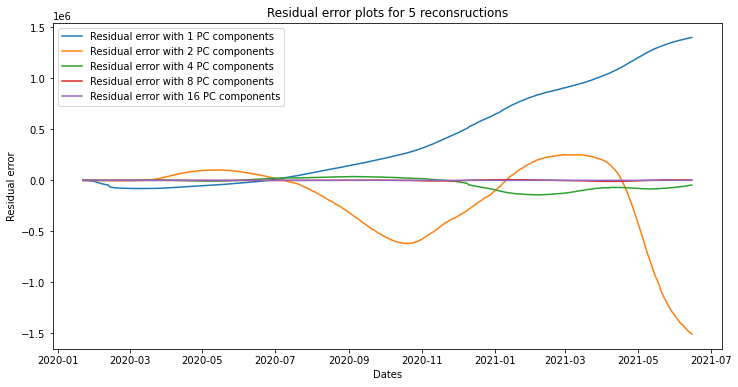

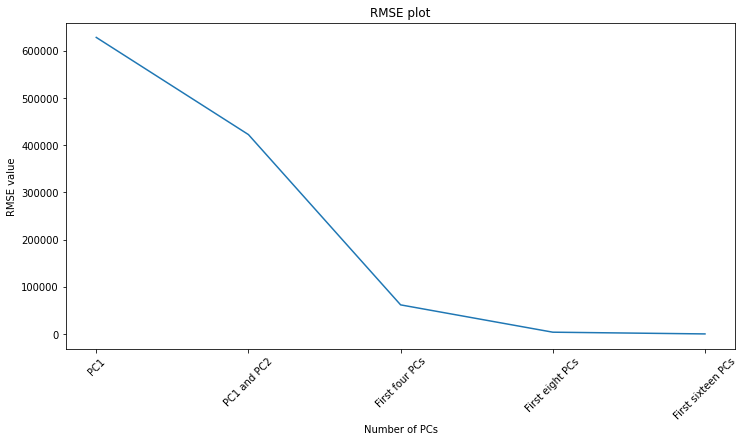

In [25]:
shape_China_cases_raw = plot_country_figures(cases_raw, 'China')

# Time-series analysis on death cases 

I am calling the function on the death rates dataset for the same three countries


In [26]:
import pandas as pd
death_raw = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/aps1070-2019/datasets/master/death-june21.csv',
    index_col=0,
    thousands=','
)

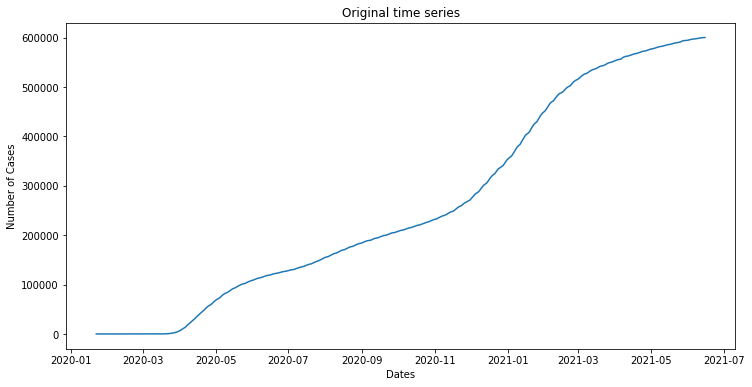

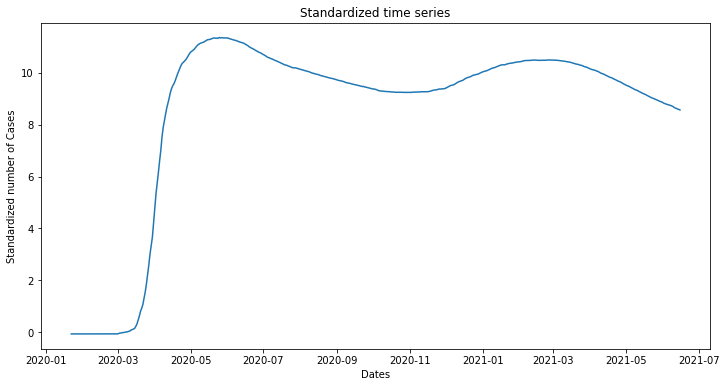

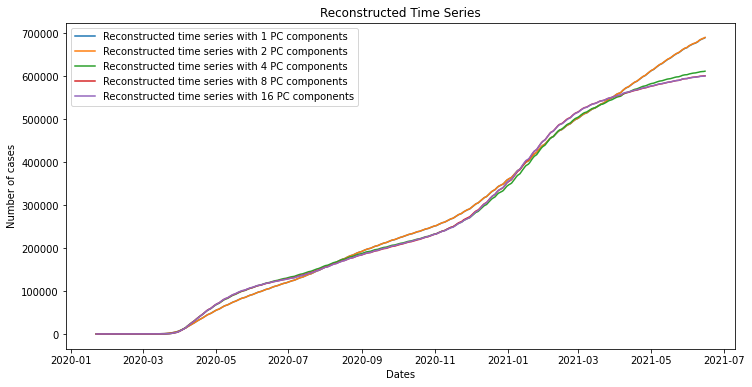

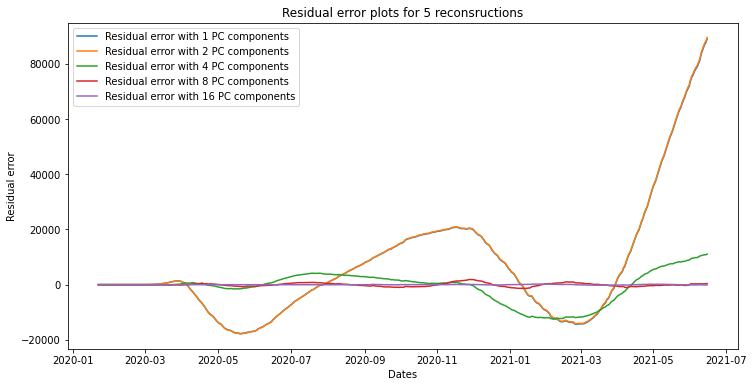

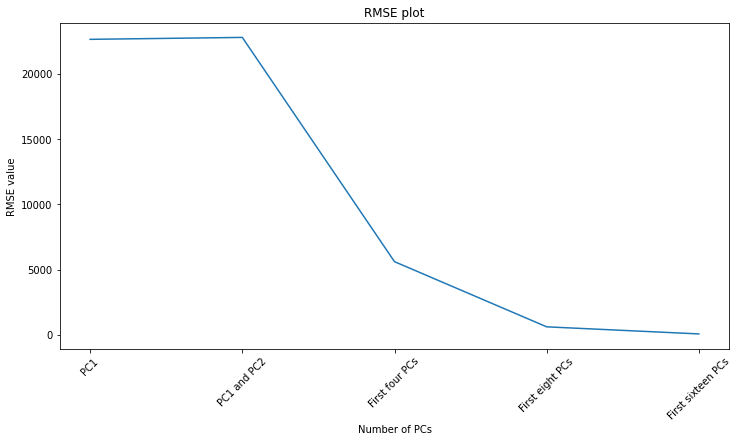

In [27]:
shape_US_death = plot_country_figures(death_raw, 'US')

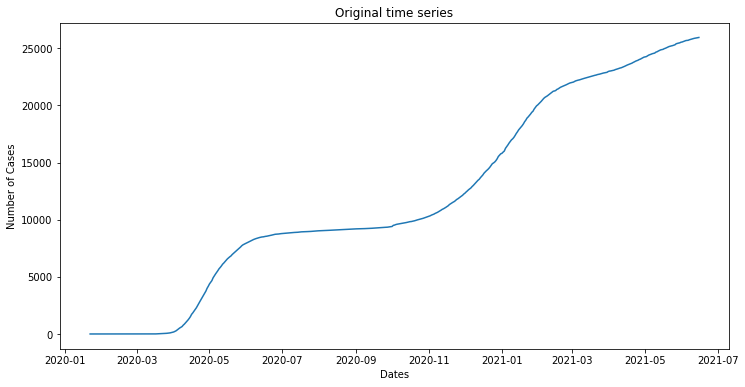

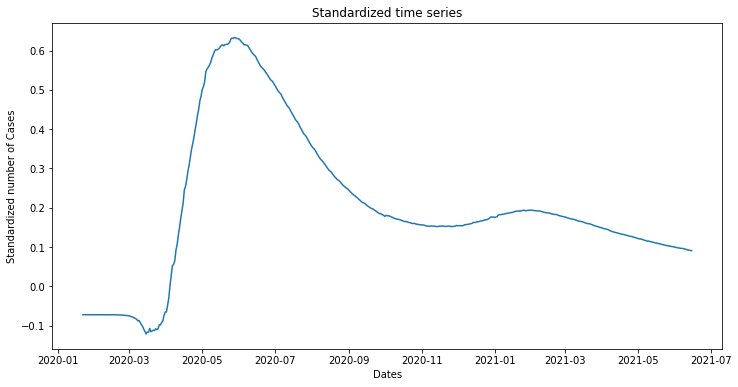

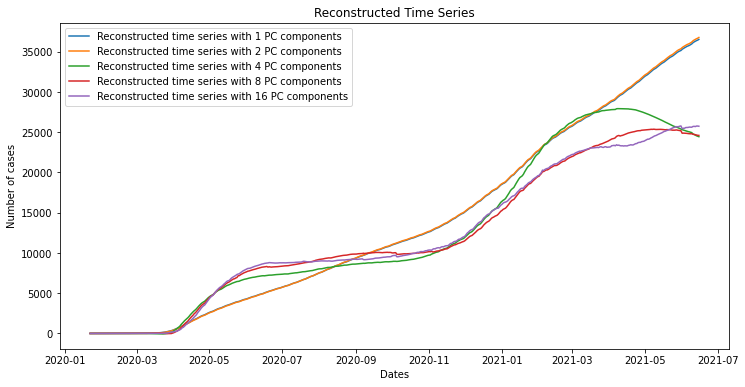

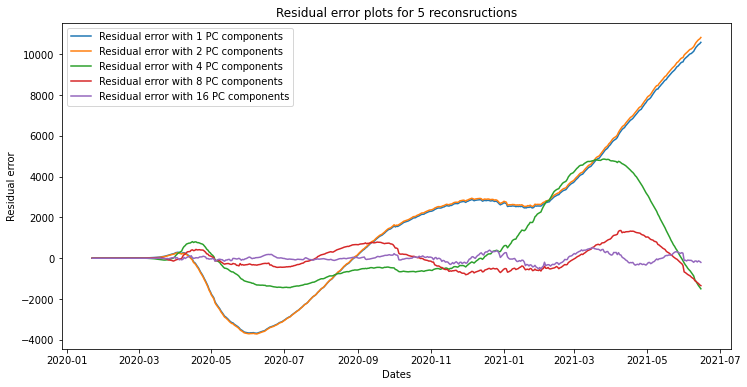

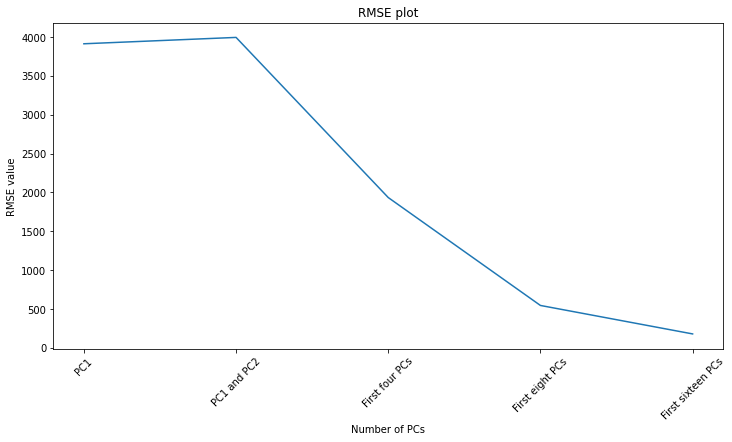

In [28]:
shape_Can_death = plot_country_figures(death_raw, 'Canada')

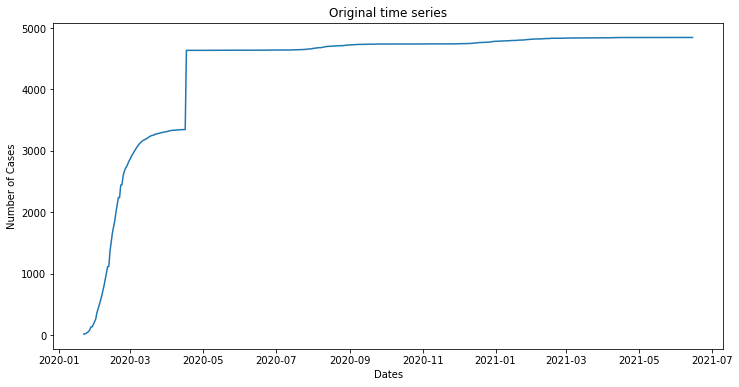

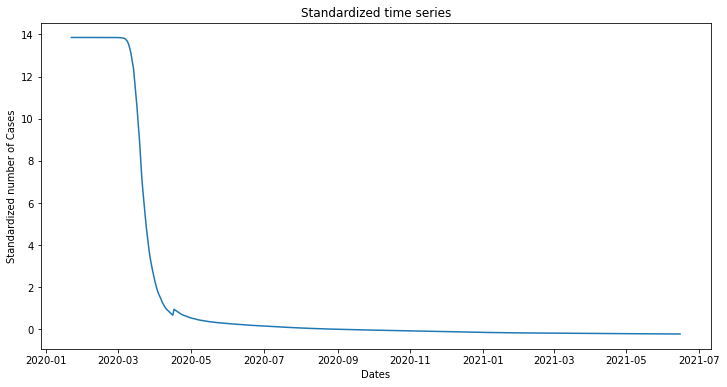

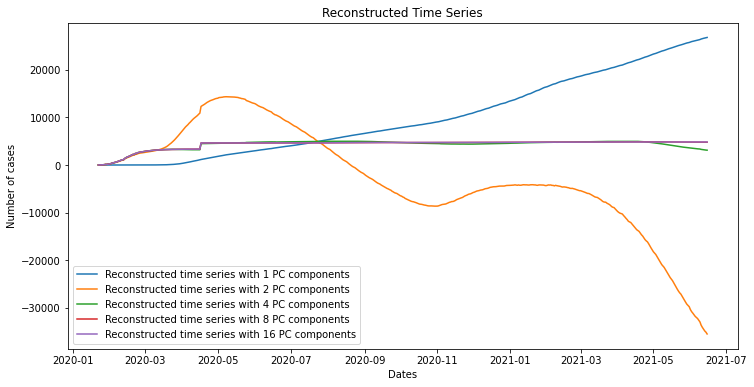

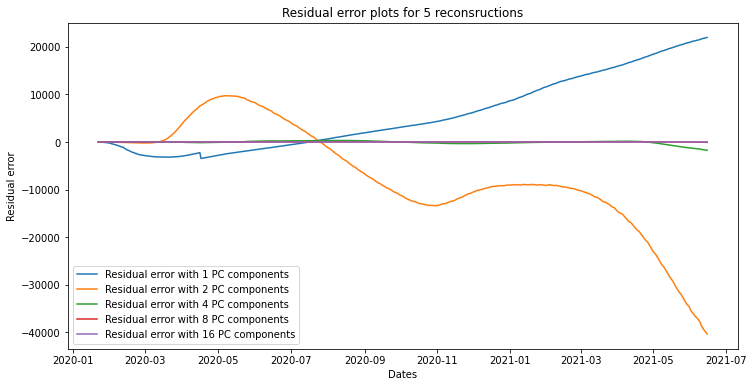

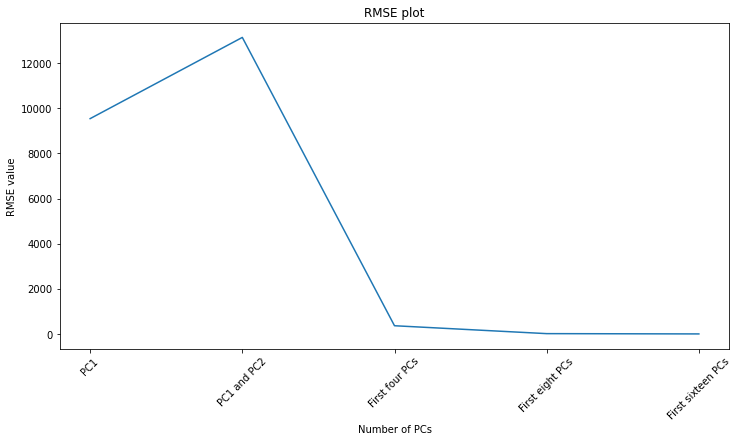

In [29]:
shape_China_death = plot_country_figures(death_raw, 'China')

# PCA on the dimension of the samples
 I am using PCA in the samples instead of the features to see how the results alter

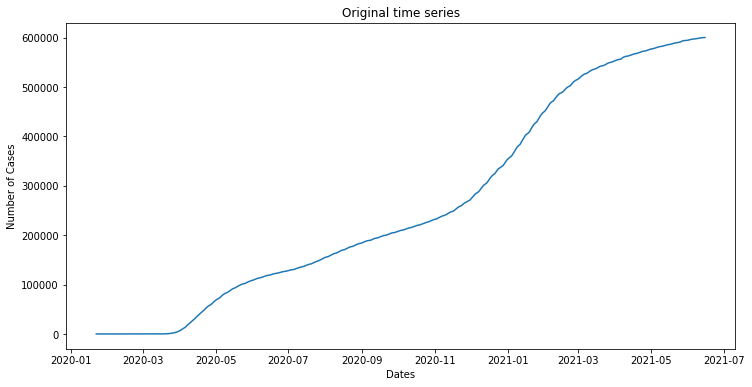

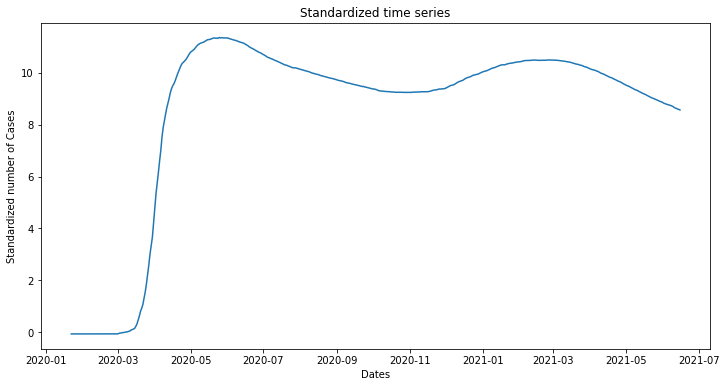

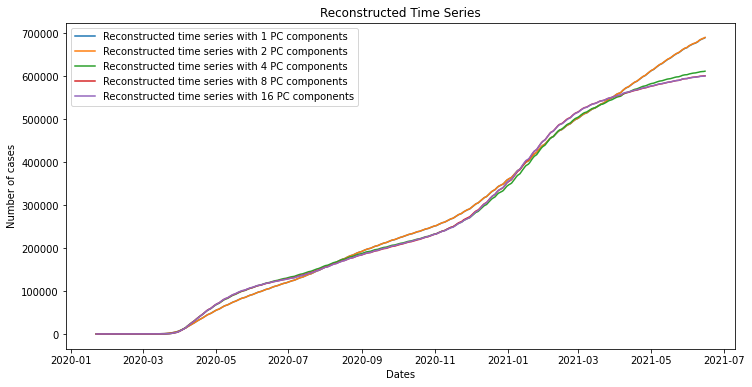

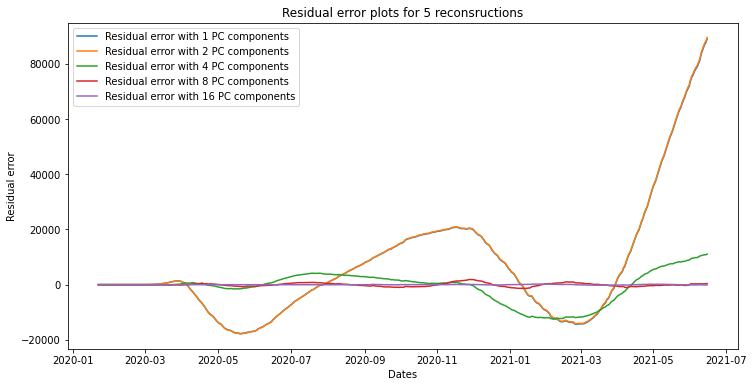

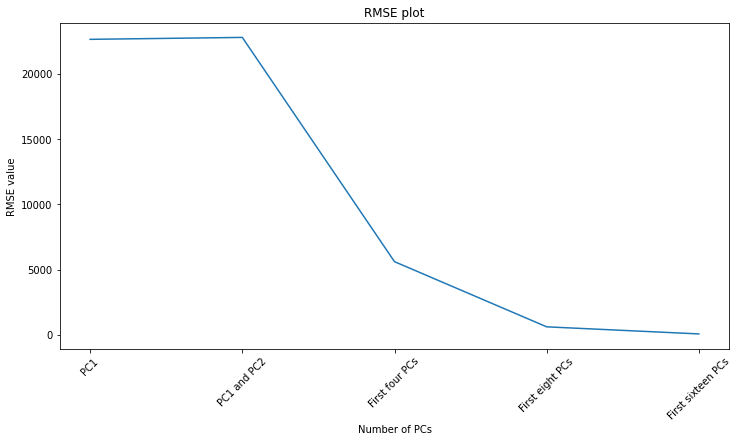

In [31]:
shape_US_death_samp = plot_country_figures(death_raw, 'US', sample = True)

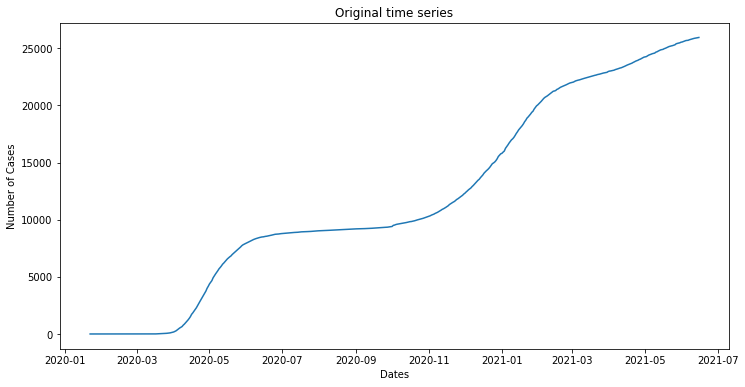

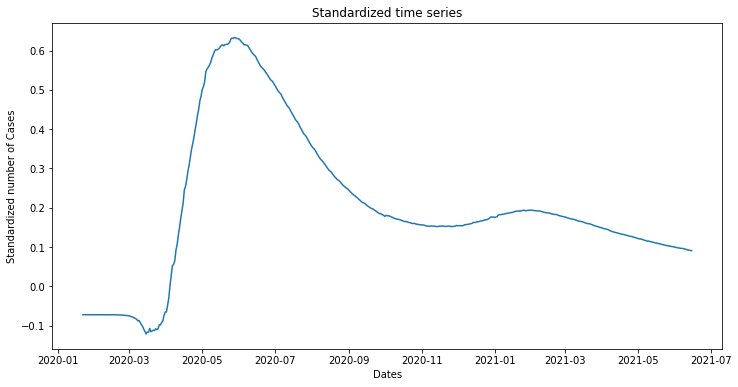

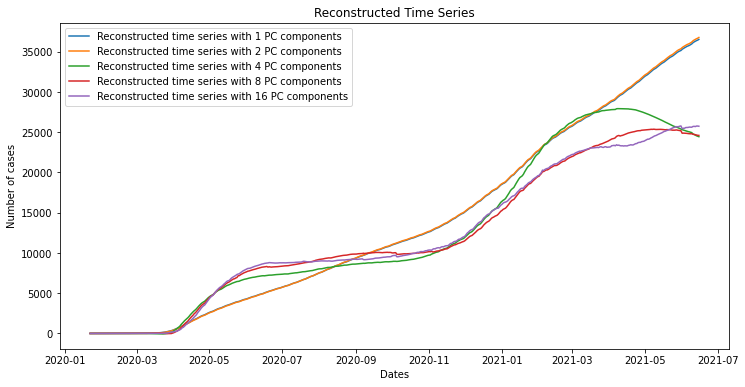

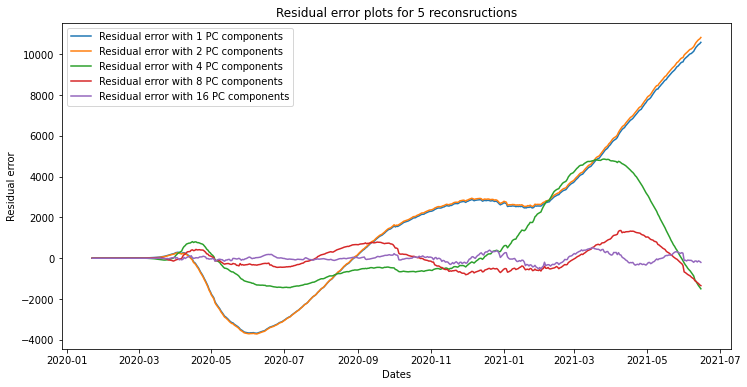

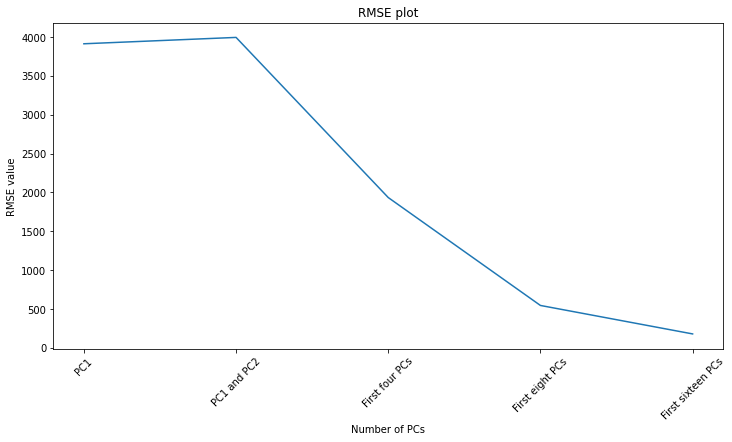

In [32]:
shape_Can_death_samp = plot_country_figures(death_raw, 'Canada',  sample = True)

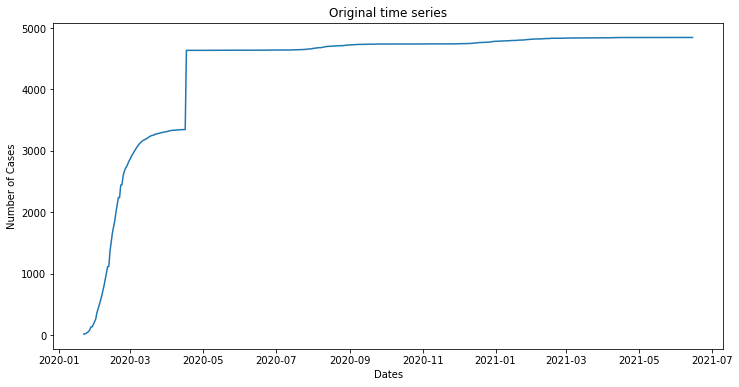

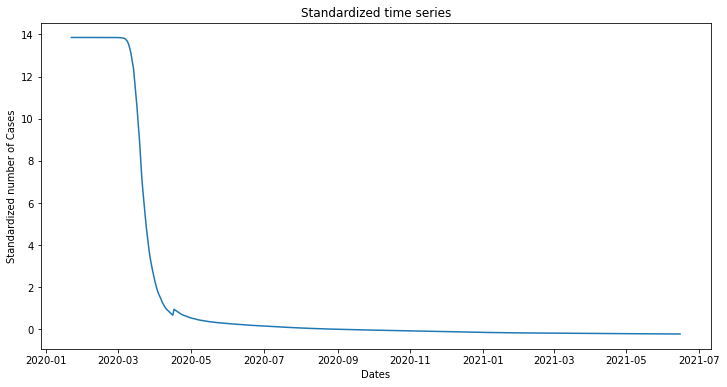

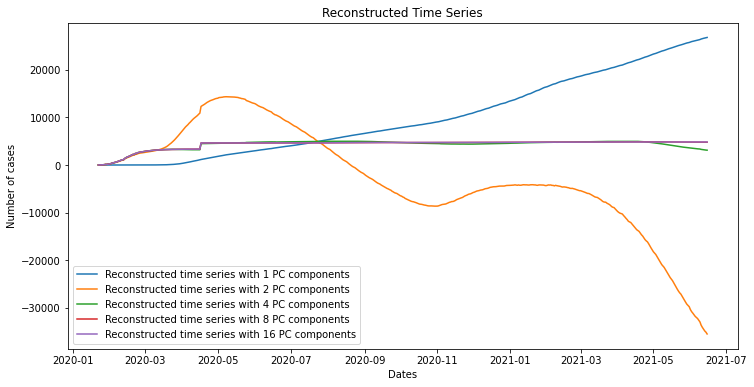

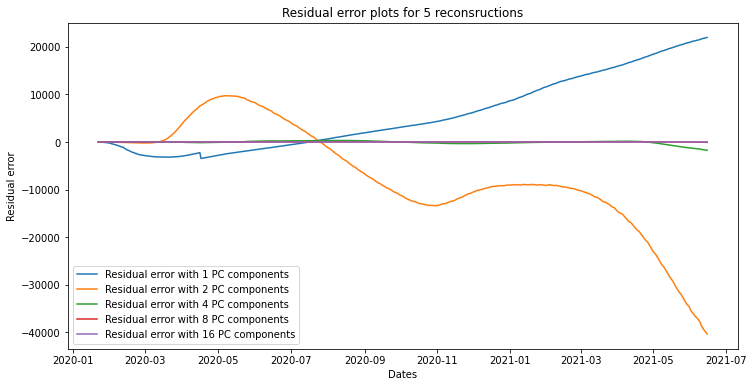

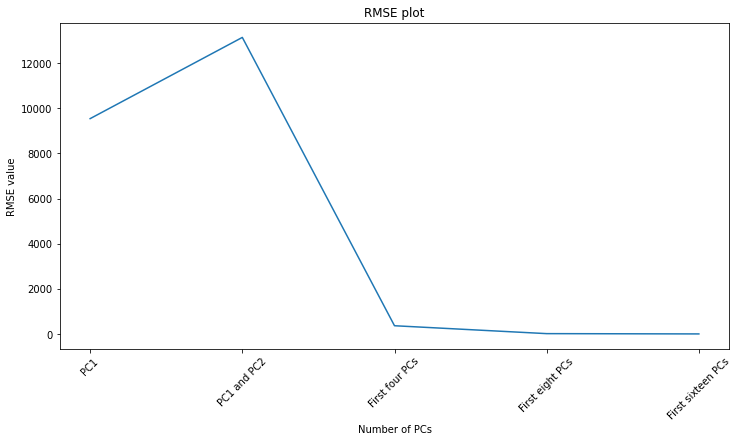

In [33]:
shape_China_death_samp = plot_country_figures(death_raw, 'China',  sample = True)

In [34]:
#lets compare the shapes of different matrices when PCA was done on features and samples 
shape_US_death_Df = pd.DataFrame(shape_US_death, columns= ['eigenvectors shape', 'proj shape', 'recon shape', 'inv_recon shape'])
shape_US_death_Df['PC comp'] = [1,2,4,8,16]
shape_US_death_Df = shape_US_death_Df.set_index('PC comp')

print("The shapes of matrices when PCA was done on features \n\n",shape_US_death_Df) 

shape_US_death_samp_Df = pd.DataFrame(shape_US_death_samp, columns= ['eigenvectors shape', 'proj shape', 'recon shape', 'inv_recon shape'])
shape_US_death_samp_Df['PC comp'] = [1,2,4,8,16]
shape_US_death_samp_Df = shape_US_death_samp_Df.set_index('PC comp')

print("\n The shapes of matrices when PCA was done on samples \n\n",shape_US_death_samp_Df) 

The shapes of matrices when PCA was done on features 

         eigenvectors shape proj shape recon shape inv_recon shape
PC comp                                                          
1               (511, 511)   (193, 1)  (193, 511)      (193, 511)
2               (511, 511)   (193, 2)  (193, 511)      (193, 511)
4               (511, 511)   (193, 4)  (193, 511)      (193, 511)
8               (511, 511)   (193, 8)  (193, 511)      (193, 511)
16              (511, 511)  (193, 16)  (193, 511)      (193, 511)

 The shapes of matrices when PCA was done on samples 

         eigenvectors shape proj shape recon shape inv_recon shape
PC comp                                                          
1               (193, 193)   (511, 1)  (511, 193)      (193, 511)
2               (193, 193)   (511, 2)  (511, 193)      (193, 511)
4               (193, 193)   (511, 4)  (511, 193)      (193, 511)
8               (193, 193)   (511, 8)  (511, 193)      (193, 511)
16              (193, 193)  (



1.   From the above tables, we can see that the size of the covariance matrix is different for the features and the samples.
2.   While the projection is performed on standardized dataframe in the former ([193,511]*[511,1] for one PC), the projection is performed on the transpose of the standardized dataframe ([511, 193]*[193,1] for one PC) in the latter. 
3. That is why, the projection matrix shape is different. 
4. While performing reconstruction with PCA on features, the reconstruction matrix is calculated as using projection and transpose of eigenvectors- [193,1]*[1,511]- which gives [193,511].
5. While performing reconstruction with PCA on samples, the reconstruction matrix is calculated as using projection and transpose of eigenvectors- [511,1]*[1,193]- which gives [511,193].
6. While performing inverse on reconstructed matrix, we just use the reconstruction as it is while performing PCA to features, but transpose the reconstruction while performing PCA to samples. 
7. This explains why we end up with the same inverse reconstructed dataframe for both the cases. 
8. All the plots for death_raw for all countries, is hence, the same whether we perform PCA on samples or features, as seen in the above plots



# Fashion-MNIST dataset 
Fashion-MNIST is a dataset for fashion clothes. 
Each image in Fashion-MNIST has 28x28 pixels which can be represented in an array with 784 elements. You can take a better look at this dataset in this [link](https://www.openml.org/d/40996) 
I am compressing and reconstrcuting the images using the concept of Eigen Faces for three similar looking fashion items 

In [35]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("Fashion-MNIST")
x = mnist.data[0:1000]
y = mnist.target[0:1000]
target_encoding = {0: "T-shirt/top",
1: "Trouser",
2: "Pullover",
3: "Dress",
4: "Coat",
5: "Sandal",
6: "Shirt",
7: "Sneaker",
8: "Bag",
9: "Ankle boot"}

In [38]:
df_fashion = pd.DataFrame(x)
df_fashion['target'] = y
df_fashion['target'] = df_fashion.target.replace(to_replace = {'0': "T-shirt/top", '1': "Trouser", '2': "Pullover", '3': "Dress", '4': "Coat", '5': "Sandal", '6': "Shirt", '7': "Sneaker", '8': "Bag", '9': "Ankle boot"})


In [39]:
df_fashion_sub = df_fashion.loc[df_fashion['target'].isin(['Pullover', 'Shirt', 'Coat'])]
#df_fashion_sub.reset_index(inplace=True)
df_fashion_sub

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,target
5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,22.0,88.0,188.0,172.0,132.0,125.0,141.0,199.0,143.0,9.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,20.0,131.0,199.0,206.0,196.0,202.0,...,0.0,0.0,0.0,0.0,0.0,224.0,197.0,123.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,141.0,151.0,76.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,133.0,167.0,73.0,0.0,0.0,0.0,Pullover
7,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,63.0,28.0,0.0,0.0,0.0,33.0,85.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,28.0,126.0,241.0,255.0,...,0.0,0.0,0.0,4.0,0.0,103.0,246.0,247.0,72.0,0.0,0.0,0.0,0.0,0.0,1.0,95.0,77.0,52.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,82.0,237.0,231.0,70.0,0.0,0.0,Pullover
18,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,6.0,36.0,79.0,24.0,0.0,0.0,0.0,0.0,0.0,31.0,73.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,153.0,160.0,153.0,176.0,189.0,...,186.0,116.0,118.0,133.0,114.0,170.0,221.0,179.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0,133.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,160.0,100.0,0.0,0.0,0.0,Shirt
19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,12.0,55.0,98.0,52.0,45.0,70.0,47.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39.0,52.0,93.0,...,70.0,70.0,76.0,93.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,53.0,45.0,53.0,44.0,43.0,39.0,43.0,45.0,41.0,62.0,49.0,60.0,56.0,67.0,22.0,0.0,2.0,0.0,0.0,0.0,0.0,Coat
22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,27.0,103.0,120.0,125.0,59.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,75.0,...,79.0,36.0,0.0,3.0,177.0,203.0,69.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,175.0,162.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,149.0,159.0,0.0,0.0,0.0,0.0,0.0,Coat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,91.0,193.0,205.0,...,0.0,0.0,0.0,3.0,0.0,91.0,242.0,205.0,188.0,0.0,0.0,0.0,0.0,0.0,39.0,79.0,158.0,63.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,16.0,142.0,66.0,33.0,0.0,0.0,Shirt
985,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,22.0,65.0,151.0,148.0,...,0.0,0.0,0.0,0.0,221.0,255.0,188.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85.0,148.0,150.0,0.0,0.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,5.0,0.0,0.0,134.0,158.0,88.0,0.0,0.0,0.0,0.0,Pullover
987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,15.0,7.0,12.0,16.0,14.0,15.0,12.0,14.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,Shirt
989,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,24.0,112.0,2.0,0.0,0.0,0.0,0.0,26.0,106.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,60.0,80.0,52.0,145.0,221.0,...,0.0,3.0,0.0,42.0,139.0,102.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61.0,89.0,129.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,23.0,109.0,93.0,3.0,0.0,0.0,0.0,0.0,Pullover


1. The reason why we try to choose similar shapes as the three categories is that, with similar shapes, the principle component analysis method is able to take the most relevant characteristics and fit into PCs with higher variance.
2. In general, the datapoints will be centralised and the eigen vectors and values will be plotted.  
2. With very different shapes, there might be more noise and fluctuations in our eigen vectors.
3. That would increase the reconstruction error. The original image may be reconstructed with a lot of disturbance and cannot be discerned by the human eye. 

In [40]:
x_sub = df_fashion_sub.iloc[:, 0:784].values

Label is: Pullover


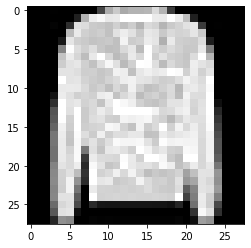

In [41]:
import matplotlib.pyplot as plt 
plt.gray() 
ind = 6
plt.imshow(x_sub[ind, 0:784].reshape(28,28)) 
print ("Label is:", df_fashion_sub.iloc[ind, 784])
plt.show() 

In [42]:
#calculating eigen values and vectors, as per the tutorial
n, d = df_fashion_sub.shape
x_sub = df_fashion_sub.iloc[:,0:784].values
mu = x_sub.mean(axis=0)
x_sub = x_sub - mu 
    
if n > d:
    C = np.dot(x_sub.T,x_sub) / (n-1) 
    eigenValues_fasion, eigenVectors_fasion = np.linalg.eigh(C)
else:
    C = np.dot(x_sub,x_sub.T) / (n-1) 
    eigenValues_fasion, eigenVectors_fasion = np.linalg.eigh(C)
    eigenVectors_fasion = np.dot(x_sub.T, eigenVectors_fasion)
    for i in range(n):
        eigenVectors_fasion[:,i] = eigenVectors_fasion[:, i] / np.linalg.norm(eigenVectors_fasion[:, i])

In [43]:
#sorting the eigenvalues and vectors 
idx = np.argsort(-eigenValues_fasion)
eigenValues_fasion = eigenValues_fasion[idx]
eigenVectors_fasion = eigenVectors_fasion[:, idx]

In [44]:
eigenValues_fasion

array([ 1.18061363e+06,  3.45634293e+05,  2.51950994e+05,  1.47365505e+05,
        9.94100944e+04,  8.09394333e+04,  6.59624952e+04,  6.25033533e+04,
        5.54376443e+04,  4.48383763e+04,  4.33532623e+04,  3.95257539e+04,
        3.38667196e+04,  2.97548413e+04,  2.85719298e+04,  2.70115624e+04,
        2.46814950e+04,  2.30085442e+04,  2.19963370e+04,  2.15575880e+04,
        1.83975238e+04,  1.75010270e+04,  1.71043417e+04,  1.55214009e+04,
        1.52042483e+04,  1.50131478e+04,  1.42829315e+04,  1.36781957e+04,
        1.26037575e+04,  1.20354887e+04,  1.11628533e+04,  1.09130942e+04,
        1.05185987e+04,  1.03621035e+04,  9.64365960e+03,  9.33624416e+03,
        9.11724572e+03,  8.83965987e+03,  8.55195443e+03,  8.41269603e+03,
        8.37872741e+03,  7.85147413e+03,  7.72545716e+03,  7.59043090e+03,
        7.49935631e+03,  7.07593922e+03,  6.89556812e+03,  6.69253561e+03,
        6.46638210e+03,  6.27794437e+03,  6.15113408e+03,  6.03958838e+03,
        5.82829945e+03,  

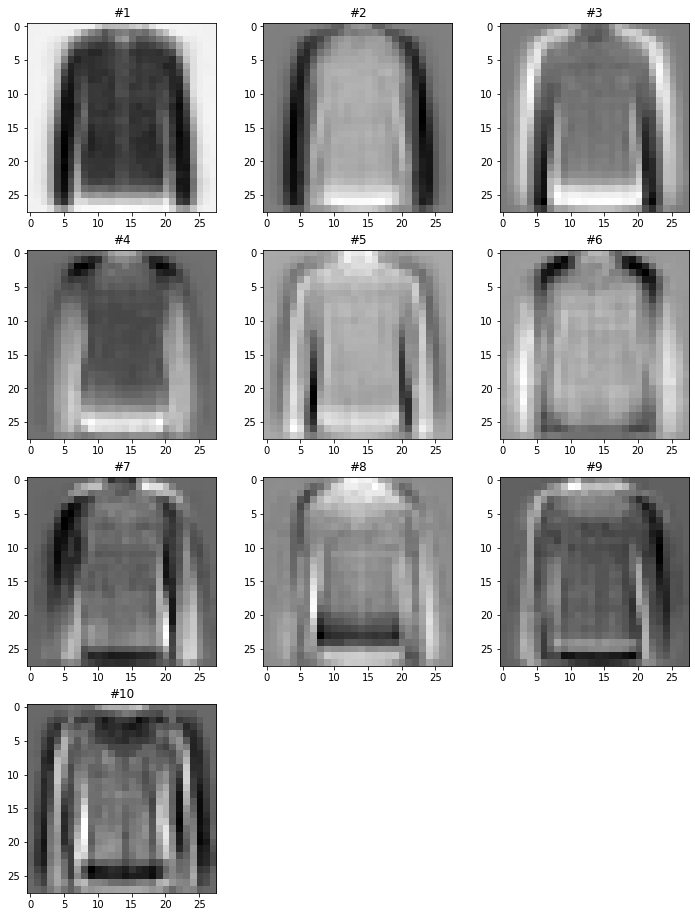

In [45]:
# print first 10 eigen faces, code from tutorial
COUNT = 10
ROWS = math.ceil(COUNT/3)
fig = plt.figure(figsize=(12, ROWS * 4))
for i in range(0, COUNT):
    plt.subplot(ROWS, 3, i+1)
    plt.imshow(eigenVectors_fasion[:, i].reshape(28, 28), cmap = plt.cm.gray)
    plt.title('#{}'.format(i+1))



1.   When we see the sorted eigenvalues, the magnitude of the eigen values for higher order Principle component is quite significant as opposed to the first part of the project when the majority of the variance was just captured in the first few PCs, and the eigen values were very close to 0 afte 5/6 PCs.  
2.   This can be seen in the eigenfaces, as the PC increases, more variance is getting captured. We can see that 3 PCs shows a pullover/shirt one on top of the other. Similarly, with 7 PCs, we can see maybe a pullover/coat behind which some other piece of clothing is there. 
3. WIth 10 PCs, more characteristics and unique elements of the clothing is captured. 
4. It would take upto 160 principle components to achieve 99% variance, as shown in the calculations below. 



In [46]:
import random

In [47]:
def recon_image(df, n, need_eig_val = False):
  l, d = df.shape
  cxx = df.iloc[:,0:784].copy().values
  x = df.iloc[:,0:784].values
  mu = x.mean(axis=0)
  x = x - mu  
  k= random.randint(0,l)

  if l > d:
      C = np.dot(x.T,x) / (l-1) 
      eigenValues_fasion, eigenVectors_fasion = np.linalg.eigh(C)
  else:
      C = np.dot(x,x.T) / (l-1) 
      eigenValues_fasion, eigenVectors_fasion = np.linalg.eigh(C)
      eigenVectors_fasion = np.dot(x.T, eigenVectors_fasion)
      for i in range(l):
          eigenVectors_fasion[:,i] = eigenVectors_fasion[:, i] / np.linalg.norm(eigenVectors_fasion[:, i])
  
  idx = np.argsort(-eigenValues_fasion)
  eigenValues_fasion = eigenValues_fasion[idx]
  eigenVectors_fasion = eigenVectors_fasion[:, idx]
  
  print("Actual Image - ", df.iloc[k,784])
  plt.imshow(cxx[k].reshape(28, 28), cmap = plt.cm.gray)
  plt.show()

  # create reconstructed images
  P = np.dot(cxx[k].reshape(1, -1) - mu , eigenVectors_fasion[:, 0:n])
  #print(P.shape)
  R = np.dot(P, eigenVectors_fasion[:, 0:n].T) + mu
  #print(R.shape)

  # plot reconstructed images
  plt.imshow((R).reshape(28,28), cmap = plt.cm.gray)
  plt.title(f'Reconstructed Image with {n} PC components')

  if need_eig_val == True:
    return eigenValues_fasion

 

  

Actual Image -  Pullover


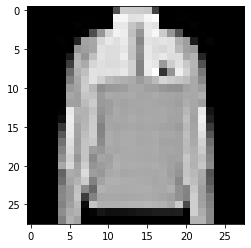

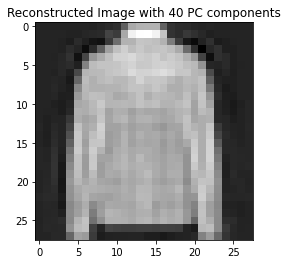

Actual Image -  Shirt


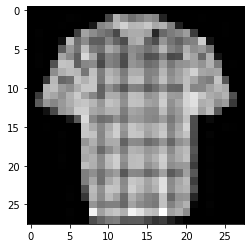

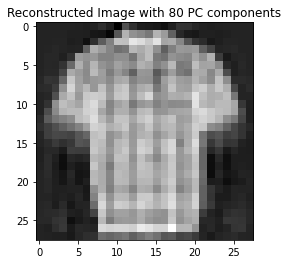

Actual Image -  Shirt


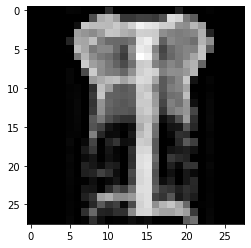

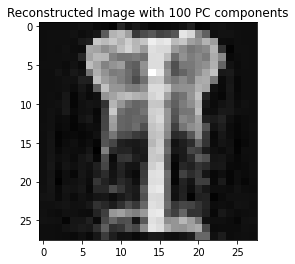

Actual Image -  Coat


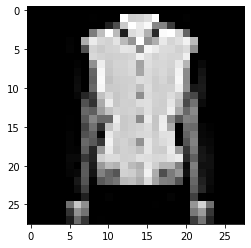

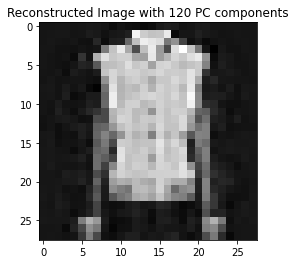

Actual Image -  Shirt


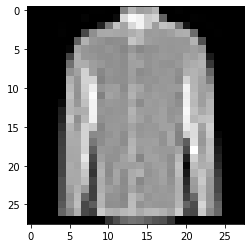

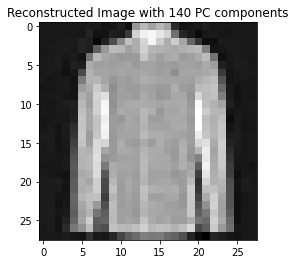

Actual Image -  Pullover


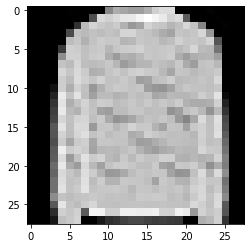

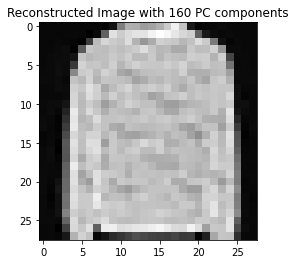

Actual Image -  Pullover


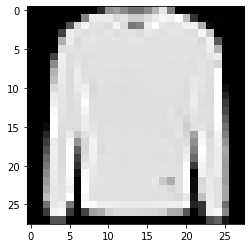

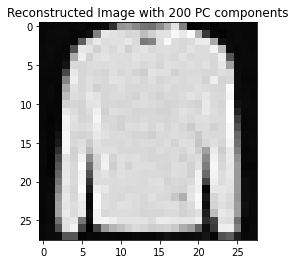

Actual Image -  Pullover


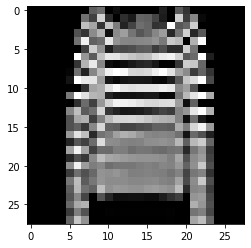

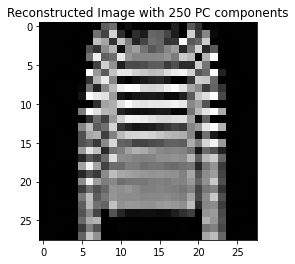

In [48]:
#visually checking which PCs are working
list_n = [40, 80, 100, 120, 140, 160, 200, 250]
#plt.subplots(2, 9)
for i in list_n:
  recon_image(df_fashion_sub, i)
  plt.show()

**120**, **140** , and **160** components is giving the most relevant reconstruction of the original image, from the above outputs 

Actual Image -  Shirt


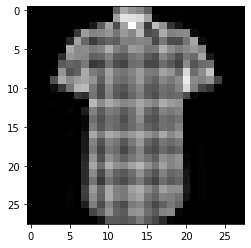

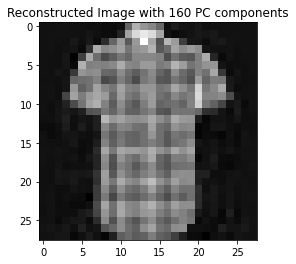

In [50]:
#getting eigenvalues
eigenValues_fasion = recon_image(df_fashion_sub, 160, need_eig_val= True )

In [51]:
#checking what number of components can capture 99% variance
no_PC_components(eigenValues_fasion)

You need the first 160 number of PC components to explain 99.0 of the variance


Actual Image -  Pullover


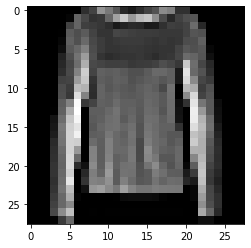

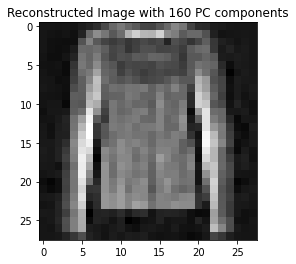

In [52]:
#calling the function for the original dataframe to see how 160 PC components is able to reconstruct the original image
recon_image(df_fashion, 160)

As noted from the reconstructed images and the cumulative variance, 160 components is chosen to represent the dataset containing Pullover, shirts abd coats

**Calculating compression ratio for 1000 images**

1. Size of original dataset = 1000 x 784 = **784000**
2. Original size of Eigen vectors = 784 x 784 = **614656**
3. Size of eigenvectors= 784 x 160 = **125440**
4. Size of Projection matrix = (1000 x 784) x (784 x 160) = 1000 x 160 = **160000**
5. Size of mean vector = (784,1) = **784**
6. Compression ratio = Original Dataset/ (Eigenvectors_proj + projection matrix + mean vector)
7. Compression ratio = 784000/(125440 + 160000 + 784) = 2.7391


# References

Understanding PCA and SVD:

1. https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8

2. https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca

3. https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues

4. https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.8-Singular-Value-Decomposition/

PCA:

1. Snippets from: https://plot.ly/ipython-notebooks/principal-component-analysis/

2. https://www.value-at-risk.net/principal-component-analysis/

Covid Data:

1. https://www.worldometers.info/coronavirus/

2. https://datahub.io/core/covid-19#resource-time-series-19-covid-combined


Fashion-MNIST:

1. https://www.openml.org/d/40996

2. https://github.com/zalandoresearch/fashion-mnist